<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   N°                 1538 non-null   int64 
 1   Date               1538 non-null   object
 2   Name               1538 non-null   object
 3   Type               1538 non-null   object
 4   Cause              1538 non-null   object
 5   Material           1538 non-null   object
 6   Collapse           1538 non-null   object
 7   Status             1538 non-null   object
 8   Country            1538 non-null   object
 9   Region             1538 non-null   object
 10  Sub-region         1538 non-null   object
 11  temperature_1.9    1528 non-null   object
 12  temperature_1.9.1  1528 non-null   object
 13  temperature_4.5    1528 non-null   object
 14  temperature_7.0    1528 non-null   object
 15  temperature_8.5    1528 non-null   object
dtypes: int64(1), object(15)
memory usage: 192.

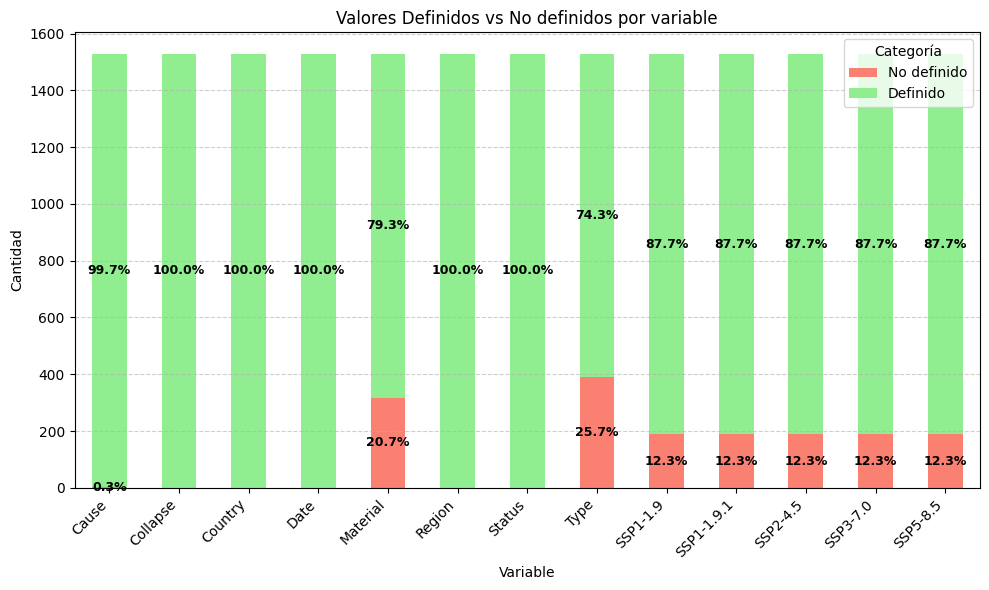

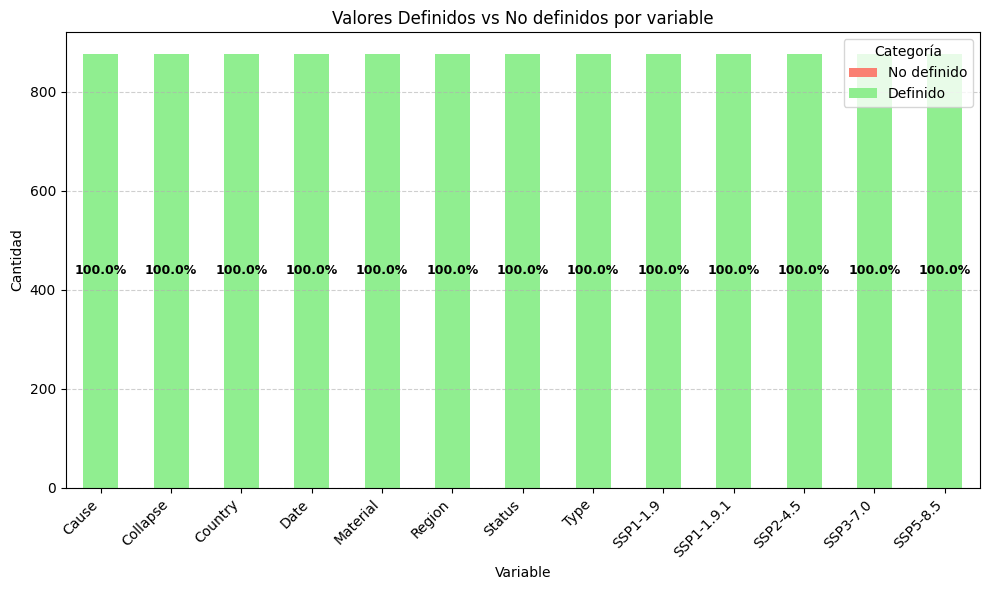

Count de X Type                 775
Cause                775
Material             775
Collapse             775
Status               775
Country              775
Region               775
Date                 775
temperature_1.9      775
temperature_1.9.1    775
temperature_4.5      775
temperature_7.0      775
temperature_8.5      775
dtype: int64


In [70]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# %%
import pandas as pd

df2 = pd.read_csv(r'E:\Tesis\Data\raw3.csv', delimiter=';', engine='python')
df2


# %%
df2.rename(columns={
    "SSP1-1.9": "temperature_1.9",
    "SSP1-1.9.1": "temperature_1.9.1",  
    "SSP2-4.5": "temperature_4.5",
    "SSP3-7.0": "temperature_7.0",
    "SSP5-8.5": "temperature_8.5"
}, inplace=True)

# %%
df2.info()

# %%
def compare_not_defined_frequency(df, column_name):
    is_not_defined = df[column_name] == "Not defined"
    
    counts = {
        "Not defined": is_not_defined.sum(),
        "Defined": (~is_not_defined).sum()
    }

    count_series = pd.Series(counts)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=count_series.index, y=count_series.values, palette="pastel")
    plt.title(f"'Not defined' vs Defined values in '{column_name}'")
    plt.ylabel("Count")
    plt.xlabel("Category")
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# %%
import pandas as pd
import matplotlib.pyplot as plt

def stacked_not_defined_comparison(df, columns_to_check):
    # Etiquetas legibles para las temperaturas
    pretty_labels = {
        "temperature_1.9": "SSP1-1.9",
        "temperature_1.9.1": "SSP1-1.9.1",
        "temperature_4.5": "SSP2-4.5",
        "temperature_7.0": "SSP3-7.0",
        "temperature_8.5": "SSP5-8.5",
    }

    data = {
        "Variable": [],
        "Category": [],
        "Count": []
    }

    for col in columns_to_check:
        col_series = df[col]
        
        if pd.api.types.is_numeric_dtype(col_series):
            not_defined_count = col_series.isna().sum()
        else:
            col_series = col_series.astype(str).str.strip()
            not_defined_count = col_series.isin(["Not defined", "No definido", "#N/A", "ER"]).sum() + col_series.isna().sum()

        defined_count = df.shape[0] - not_defined_count

        data["Variable"].extend([col, col])
        data["Category"].extend(["No definido", "Definido"])
        data["Count"].extend([not_defined_count, defined_count])

    plot_df = pd.DataFrame(data)

    pivot_df = plot_df.pivot(index="Variable", columns="Category", values="Count").fillna(0)

    for cat in ["No definido", "Definido"]:
        if cat not in pivot_df.columns:
            pivot_df[cat] = 0
    pivot_df = pivot_df[["No definido", "Definido"]]

    # Cambiar nombres por etiquetas legibles
    pivot_df = pivot_df.rename(index=pretty_labels)

    # Graficar
    ax = pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6), color=["salmon", "lightgreen"])
    plt.title("Valores Definidos vs No definidos por variable")
    plt.ylabel("Cantidad")
    plt.xlabel("Variable")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Categoría")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)

    for i, variable in enumerate(pivot_df.index):
        total = pivot_df.loc[variable].sum()
        y_offset = 0
        for category in pivot_df.columns:
            value = pivot_df.loc[variable, category]
            if value > 0:
                percent = (value / total) * 100
                ax.text(i, y_offset + value / 2, f"{percent:.1f}%", ha='center', va='center',
                        fontsize=9, color='black', fontweight='bold')
                y_offset += value

    plt.tight_layout()
    plt.show()


# %%
cat_cols=['Type','Cause','Material','Collapse','Status','Country','Region']

num_cols = [
    'Date',
    'temperature_1.9',
    'temperature_1.9.1',
    'temperature_4.5',
    'temperature_7.0',
    'temperature_8.5'
]



df2=df2.dropna()
df2=df2.drop(columns=['Name','Sub-region'])

target=['Cause']

features=cat_cols+num_cols
X=df2[features].copy()


stacked_not_defined_comparison(X, features)


# %%
X = X[
    (X['Type'] != "Not defined") &
    (X['Material'] != "Not defined") &
    (X['Cause'] != "No definido") &
    (X['Date'] != 'No date') &
    (X['Date'] != 'no date') &
    (X['temperature_1.9'] != "ER") &
    (X['temperature_1.9'] != "#N/A") &
    (X['temperature_1.9.1'] != "ER") &
    (X['temperature_1.9.1'] != "#N/A") &
    (X['temperature_4.5'] != "ER") &
    (X['temperature_4.5'] != "#N/A") &
    (X['temperature_7.0'] != "ER") &
    (X['temperature_7.0'] != "#N/A") &
    (X['temperature_8.5'] != "ER") &
    (X['temperature_8.5'] != "#N/A")
]


X['Date']=pd.to_datetime(X['Date'],errors='coerce').dt.year
X=X.dropna(subset=['Date'])




# %%
stacked_not_defined_comparison(X, features)

# %%
temperature_columns = [
    'temperature_1.9',
    'temperature_1.9.1',
    'temperature_4.5',
    'temperature_7.0',
    'temperature_8.5'
]

for col in temperature_columns:
    X[col] = (
        X[col]
        .astype(str)
        .str.replace(',', '.', regex=False)
        .str.replace(r'[^\d\.\-]', '', regex=True)
        .str.strip()
    )

X[temperature_columns] = X[temperature_columns].apply(pd.to_numeric, errors='coerce')


# %%

temp_df=X


X = X[
    (X['Cause'] != "Deterioration") &
    (X['Cause'] != "Earthquake") &
    (X['Cause'] != "Terrorism") &
    (X['Cause'] != "Huricane") &
    (X['Cause'] != "Ciclon") 
]
temp_df=X

print("Count de X "+str(X.count()))

Y=X['Cause'].copy()

cat_cols.remove("Cause")
X=X.drop(columns=['Cause'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   N°                 1538 non-null   int64 
 1   Date               1538 non-null   object
 2   Name               1538 non-null   object
 3   Type               1538 non-null   object
 4   Cause              1538 non-null   object
 5   Material           1538 non-null   object
 6   Collapse           1538 non-null   object
 7   Status             1538 non-null   object
 8   Country            1538 non-null   object
 9   Region             1538 non-null   object
 10  Sub-region         1538 non-null   object
 11  temperature_1.9    1528 non-null   object
 12  temperature_1.9.1  1528 non-null   object
 13  temperature_4.5    1528 non-null   object
 14  temperature_7.0    1528 non-null   object
 15  temperature_8.5    1528 non-null   object
dtypes: int64(1), object(15)
memory usage: 192.

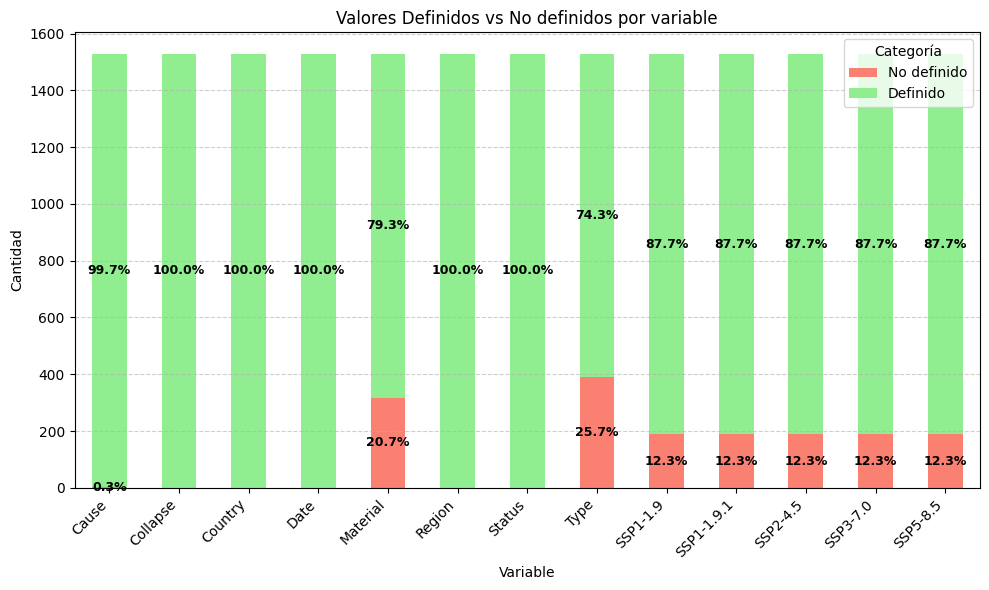

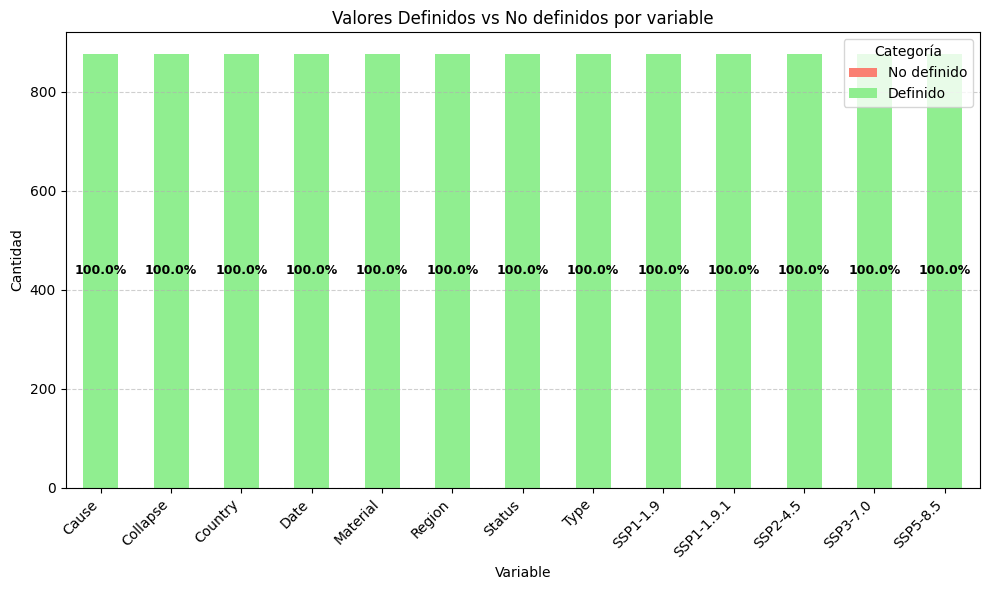

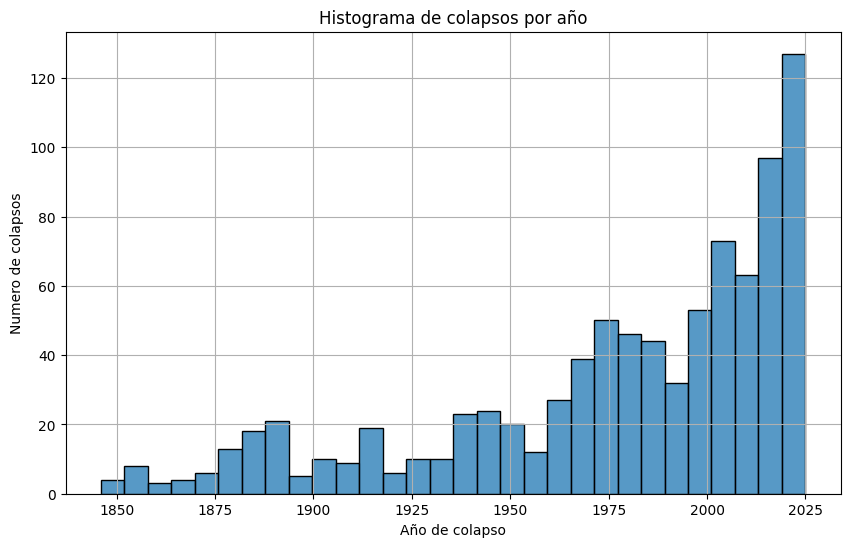

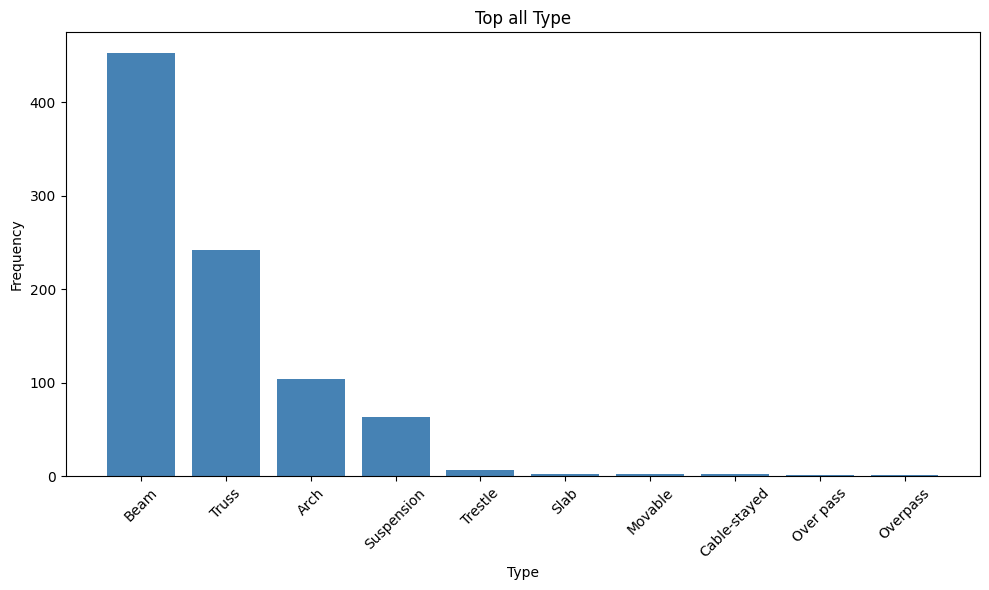

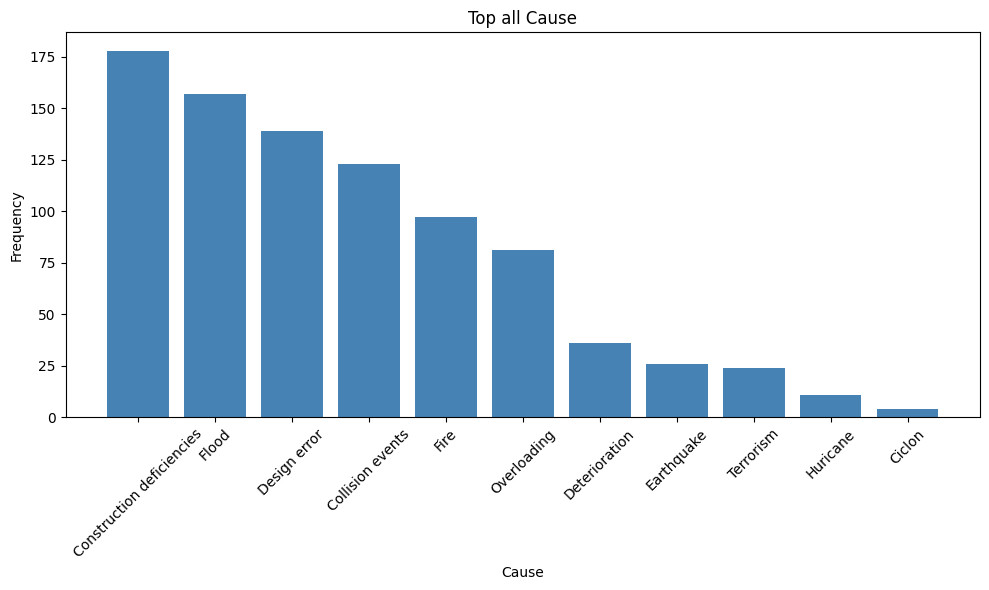

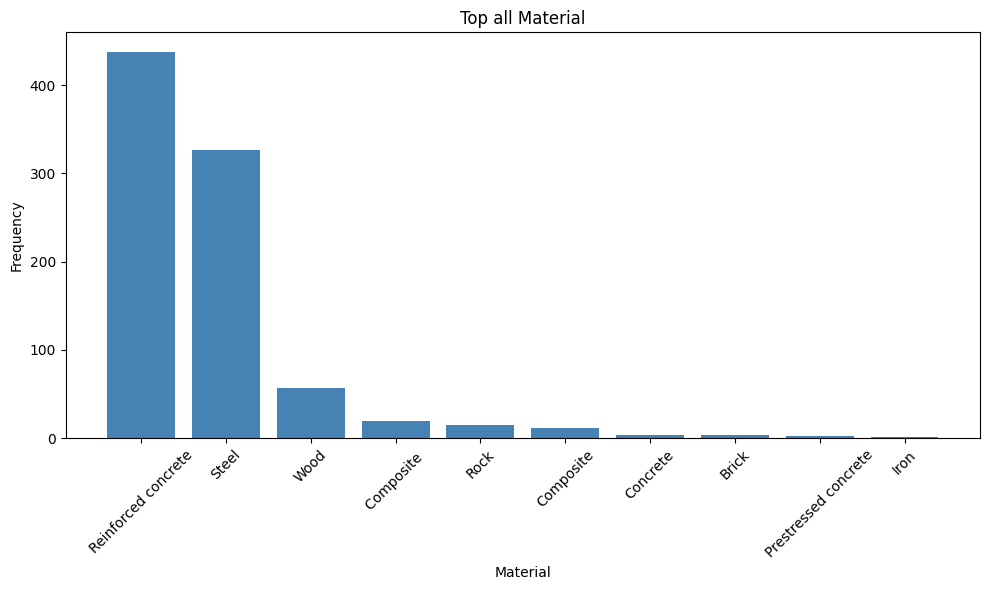

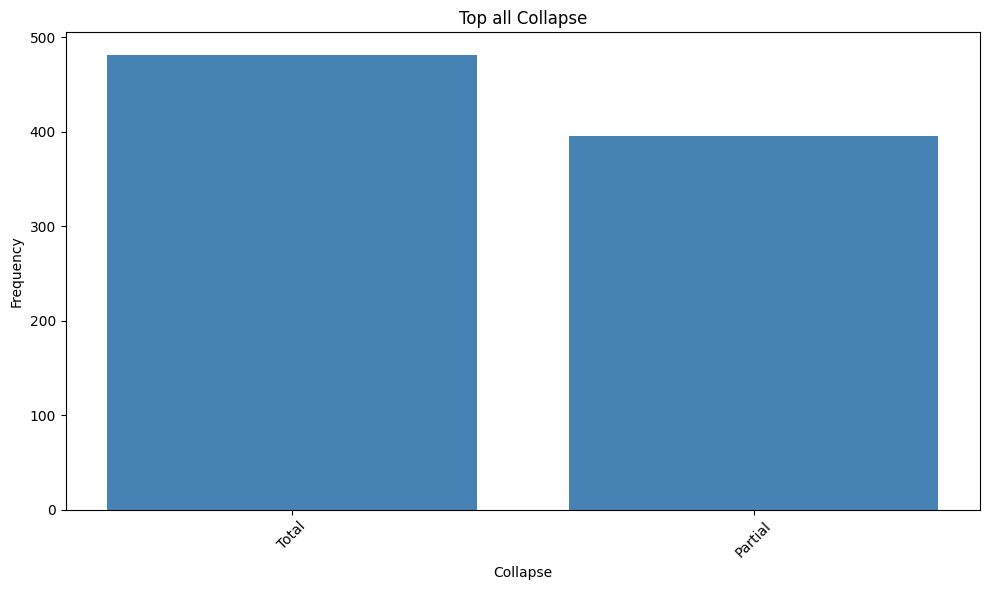

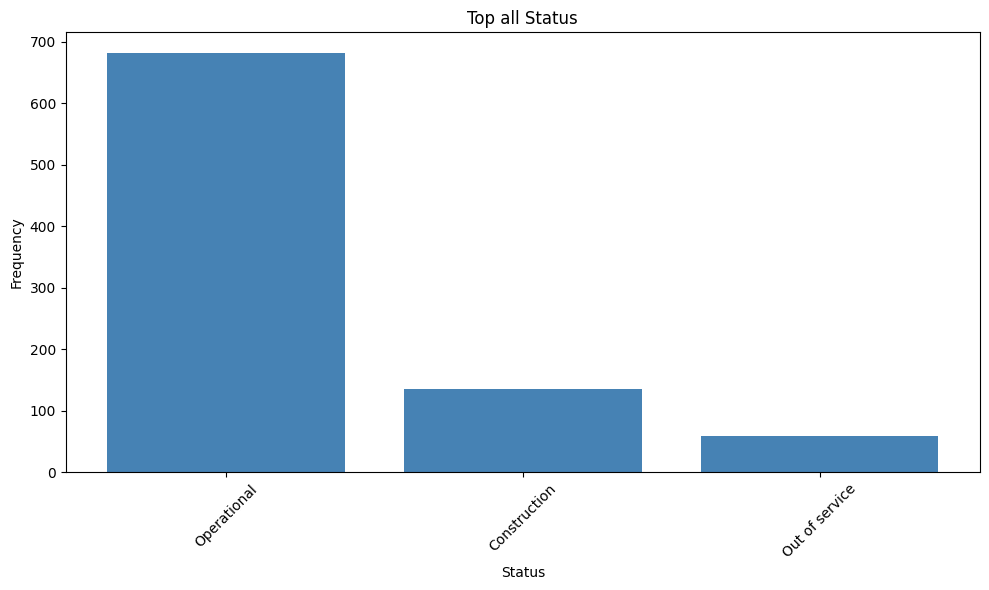

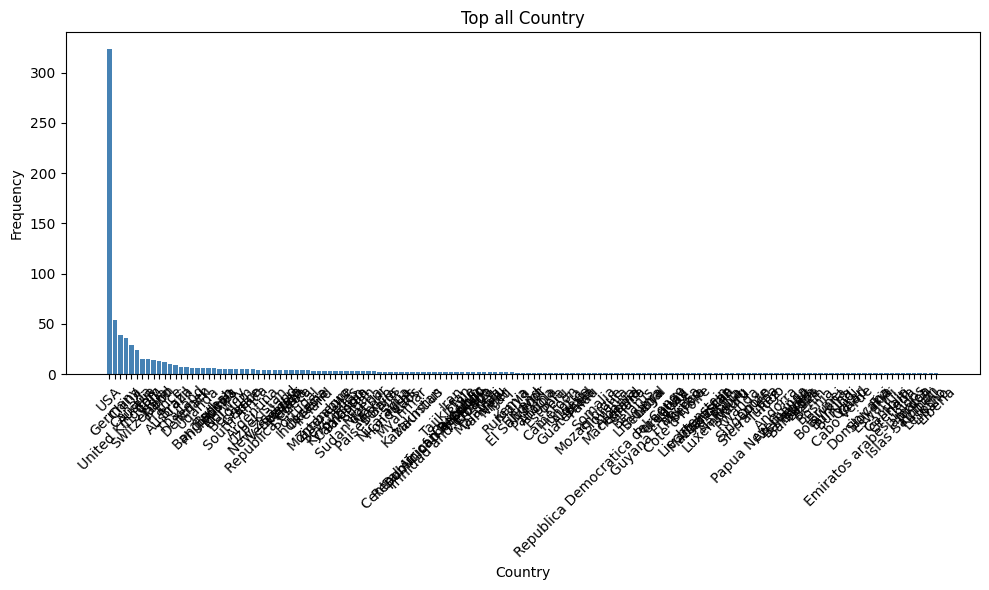

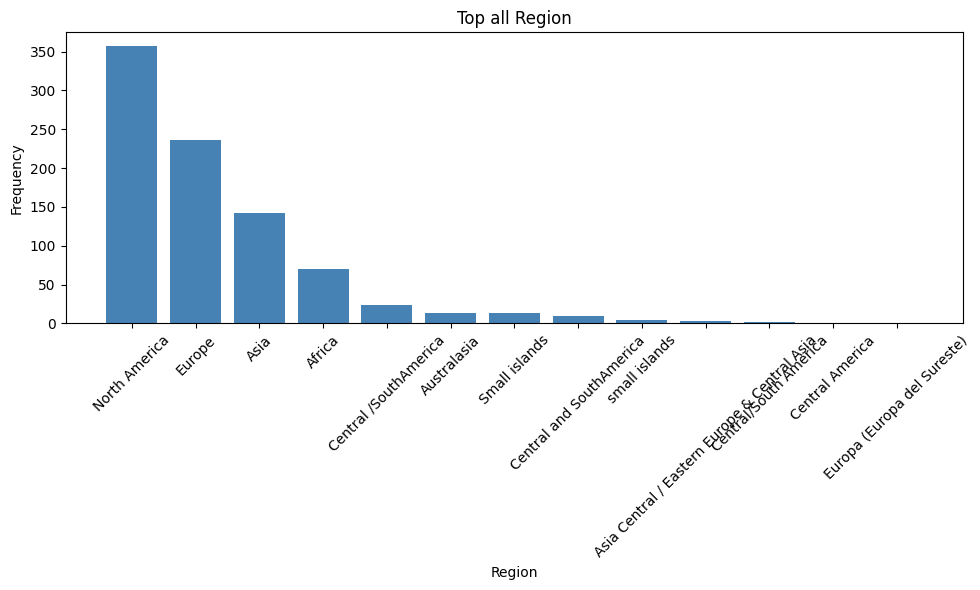

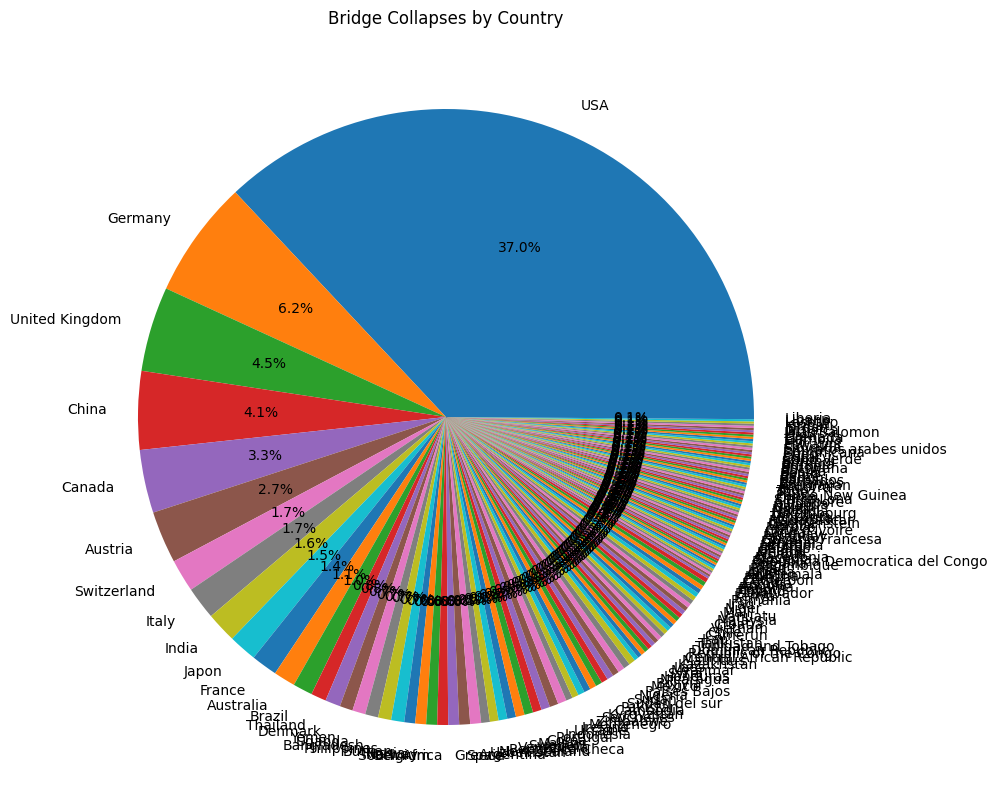

Count de X Type                 872
Cause                872
Material             872
Collapse             872
Status               872
Country              872
Region               872
Date                 872
temperature_1.9      872
temperature_1.9.1    872
temperature_4.5      872
temperature_7.0      872
temperature_8.5      872
dtype: int64


In [71]:
#### 2 with AUTOENCODER
#######
#####


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# %%
import pandas as pd

df2 = pd.read_csv(r'E:\Tesis\Data\raw3.csv', delimiter=';', engine='python')
df2


# %%
df2.rename(columns={
    "SSP1-1.9": "temperature_1.9",
    "SSP1-1.9.1": "temperature_1.9.1",  
    "SSP2-4.5": "temperature_4.5",
    "SSP3-7.0": "temperature_7.0",
    "SSP5-8.5": "temperature_8.5"
}, inplace=True)

# %%
df2.info()

# %%
def compare_not_defined_frequency(df, column_name):
    is_not_defined = df[column_name] == "Not defined"
    
    counts = {
        "Not defined": is_not_defined.sum(),
        "Defined": (~is_not_defined).sum()
    }

    count_series = pd.Series(counts)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=count_series.index, y=count_series.values, palette="pastel")
    plt.title(f"'Not defined' vs Defined values in '{column_name}'")
    plt.ylabel("Count")
    plt.xlabel("Category")
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# %%
import pandas as pd
import matplotlib.pyplot as plt

def stacked_not_defined_comparison(df, columns_to_check):
    # Etiquetas legibles para las temperaturas
    pretty_labels = {
        "temperature_1.9": "SSP1-1.9",
        "temperature_1.9.1": "SSP1-1.9.1",
        "temperature_4.5": "SSP2-4.5",
        "temperature_7.0": "SSP3-7.0",
        "temperature_8.5": "SSP5-8.5",
    }

    data = {
        "Variable": [],
        "Category": [],
        "Count": []
    }

    for col in columns_to_check:
        col_series = df[col]
        
        if pd.api.types.is_numeric_dtype(col_series):
            not_defined_count = col_series.isna().sum()
        else:
            col_series = col_series.astype(str).str.strip()
            not_defined_count = col_series.isin(["Not defined", "No definido", "#N/A", "ER"]).sum() + col_series.isna().sum()

        defined_count = df.shape[0] - not_defined_count

        data["Variable"].extend([col, col])
        data["Category"].extend(["No definido", "Definido"])
        data["Count"].extend([not_defined_count, defined_count])

    plot_df = pd.DataFrame(data)

    pivot_df = plot_df.pivot(index="Variable", columns="Category", values="Count").fillna(0)

    for cat in ["No definido", "Definido"]:
        if cat not in pivot_df.columns:
            pivot_df[cat] = 0
    pivot_df = pivot_df[["No definido", "Definido"]]

    # Cambiar nombres por etiquetas legibles
    pivot_df = pivot_df.rename(index=pretty_labels)

    # Graficar
    ax = pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6), color=["salmon", "lightgreen"])
    plt.title("Valores Definidos vs No definidos por variable")
    plt.ylabel("Cantidad")
    plt.xlabel("Variable")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Categoría")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)

    for i, variable in enumerate(pivot_df.index):
        total = pivot_df.loc[variable].sum()
        y_offset = 0
        for category in pivot_df.columns:
            value = pivot_df.loc[variable, category]
            if value > 0:
                percent = (value / total) * 100
                ax.text(i, y_offset + value / 2, f"{percent:.1f}%", ha='center', va='center',
                        fontsize=9, color='black', fontweight='bold')
                y_offset += value

    plt.tight_layout()
    plt.show()


# %%
cat_cols=['Type','Cause','Material','Collapse','Status','Country','Region']

num_cols = [
    'Date',
    'temperature_1.9',
    'temperature_1.9.1',
    'temperature_4.5',
    'temperature_7.0',
    'temperature_8.5'
]



df2=df2.dropna()
df2=df2.drop(columns=['Name','Sub-region'])

target=['Cause']

features=cat_cols+num_cols
X=df2[features].copy()


stacked_not_defined_comparison(X, features)


# %%
X = X[
    (X['Type'] != "Not defined") &
    (X['Material'] != "Not defined") &
    (X['Cause'] != "No definido") &
    (X['Date'] != 'No date') &
    (X['Date'] != 'no date') &
    (X['temperature_1.9'] != "ER") &
    (X['temperature_1.9'] != "#N/A") &
    (X['temperature_1.9.1'] != "ER") &
    (X['temperature_1.9.1'] != "#N/A") &
    (X['temperature_4.5'] != "ER") &
    (X['temperature_4.5'] != "#N/A") &
    (X['temperature_7.0'] != "ER") &
    (X['temperature_7.0'] != "#N/A") &
    (X['temperature_8.5'] != "ER") &
    (X['temperature_8.5'] != "#N/A")
]


X['Date']=pd.to_datetime(X['Date'],errors='coerce').dt.year
X=X.dropna(subset=['Date'])




# %%
stacked_not_defined_comparison(X, features)

# %%
temperature_columns = [
    'temperature_1.9',
    'temperature_1.9.1',
    'temperature_4.5',
    'temperature_7.0',
    'temperature_8.5'
]

for col in temperature_columns:
    X[col] = (
        X[col]
        .astype(str)
        .str.replace(',', '.', regex=False)
        .str.replace(r'[^\d\.\-]', '', regex=True)
        .str.strip()
    )

X[temperature_columns] = X[temperature_columns].apply(pd.to_numeric, errors='coerce')


# %% [markdown]
# # Frecuencias
# 

# %%
df=X

# %%
plt.figure(figsize=(10,6))
sns.histplot(df['Date'].dropna(), bins=30, kde=False)
plt.xlabel('Año de colapso')
plt.ylabel('Numero de colapsos')
plt.title('Histograma de colapsos por año')
plt.grid(True)
plt.show()


# %%
def plot_top_values(df, column, n=None):
    if n is None:
        values = df[column].value_counts()
    else:
        values = df[column].value_counts().head(n)
    
    plt.figure(figsize=(10, 6))
    plt.bar(values.index, values.values, color='steelblue')
    plt.title('Top ' + (str(n) if n else 'all') + ' ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# %%
temp_cat_cols=cat_cols.copy()
temp_cat_cols.append("Cause")

for column in cat_cols:
    plot_top_values(df,column)


# %%

country_counts = df['Country'].value_counts()
country_counts.plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')
plt.title('Bridge Collapses by Country')
plt.ylabel('')
plt.show()

# %% [markdown]
# # Eliminacion de Outliers

# %%

temp_df=X

## Eliminacion de Causes que tienen pocos valores
X = X[

    (X['Cause'] != "Ciclon") 
]
temp_df=X


print("Count de X "+str(X.count()))

Y=X['Cause'].copy()

cat_cols.remove("Cause")
X=X.drop(columns=['Cause'])


# %%
temp_df

# %%
temp_df_no_cause=temp_df.drop("Cause",axis=1)

# %% [markdown]

In [72]:
X

,Type,Material,Collapse,Status,Country,Region,Date,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5
0,Truss,Steel,Total,Operational,Germany,Europe,1945.0,-0.27856,-0.021440,-0.02468,0.082760,-0.024680
1,Trestle,Composite,Total,Operational,Canada,North America,2012.0,1.58241,1.726760,1.92925,1.756970,1.971835
2,Beam,Reinforced concrete,Total,Operational,Canada,North America,2024.0,2.58803,2.722245,3.03332,2.274200,2.578360
23,Suspension,Reinforced concrete,Total,Operational,El Salvador,Central /SouthAmerica,1984.0,0.21845,0.167995,0.11754,0.167995,0.114890
34,Suspension,Rock,Total,Operational,Russia,Europe,1905.0,-0.10731,-0.244030,-0.15941,-0.386810,-0.328650
...,...,...,...,...,...,...,...,...,...,...,...,...
1531,Beam,Reinforced concrete,Total,Operational,Jamaica,Small islands,2024.0,2.58803,1.154960,1.20863,1.043770,1.130410
1532,Beam,Reinforced concrete,Total,Construction,Jordan,Asia,2003.0,1.06424,0.899050,1.01453,1.045700,1.014530
1534,Beam,Composite,Partial,Operational,Lesotho,Africa,2020.0,1.67965,1.289420,1.18791,1.369190,1.309620
1535,Beam,Reinforced concrete,Partial,Operational,Libano,Asia,2006.0,0.97806,1.246685,1.38773,1.246685,1.270530


# STAT COUNTRY REGION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   N°                 1538 non-null   int64 
 1   Date               1538 non-null   object
 2   Name               1538 non-null   object
 3   Type               1538 non-null   object
 4   Cause              1538 non-null   object
 5   Material           1538 non-null   object
 6   Collapse           1538 non-null   object
 7   Status             1538 non-null   object
 8   Country            1538 non-null   object
 9   Region             1538 non-null   object
 10  Sub-region         1538 non-null   object
 11  temperature_1.9    1528 non-null   object
 12  temperature_1.9.1  1528 non-null   object
 13  temperature_4.5    1528 non-null   object
 14  temperature_7.0    1528 non-null   object
 15  temperature_8.5    1528 non-null   object
dtypes: int64(1), object(15)
memory usage: 192.

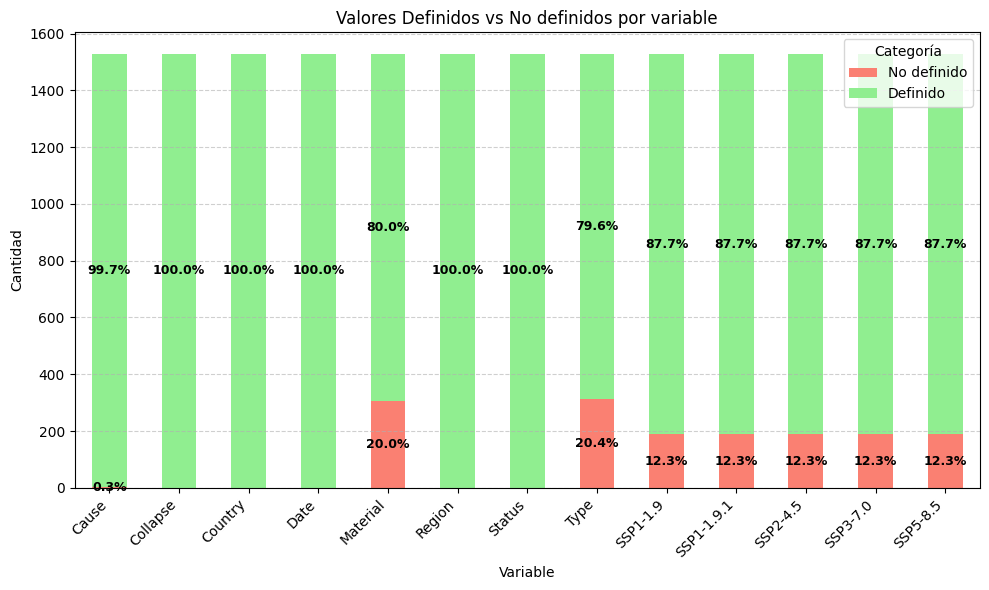

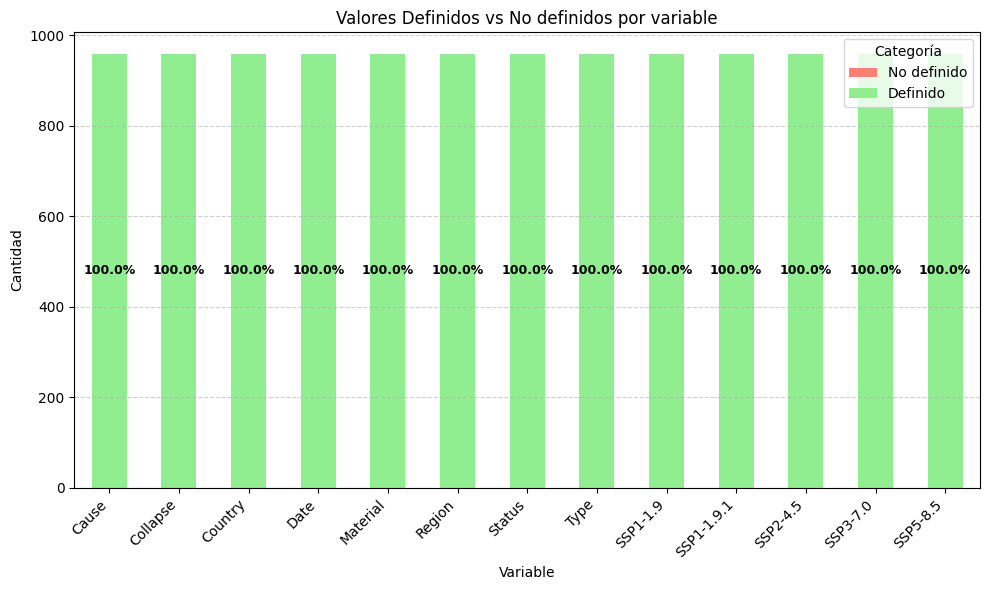

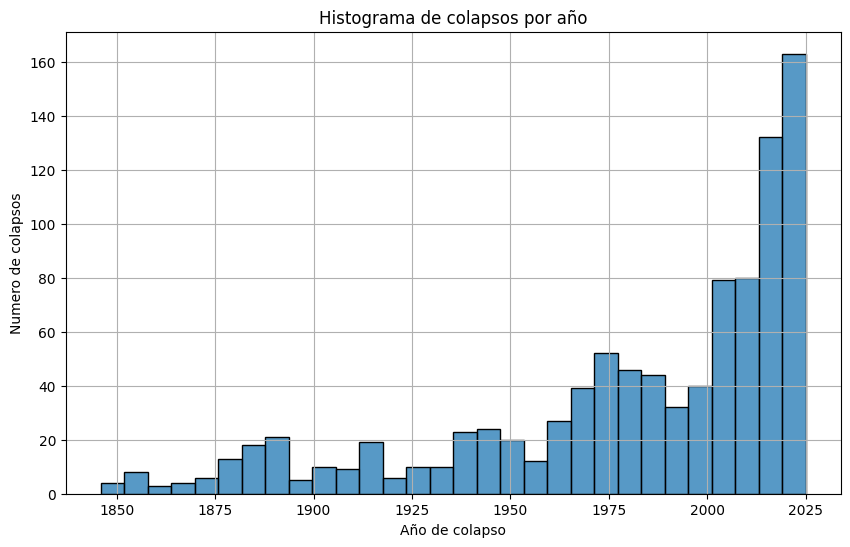

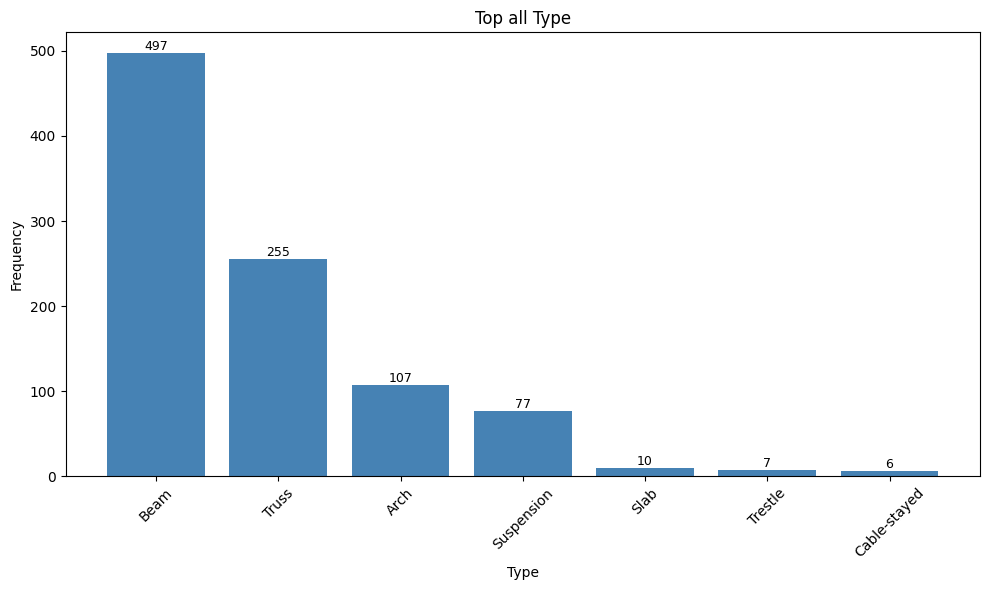

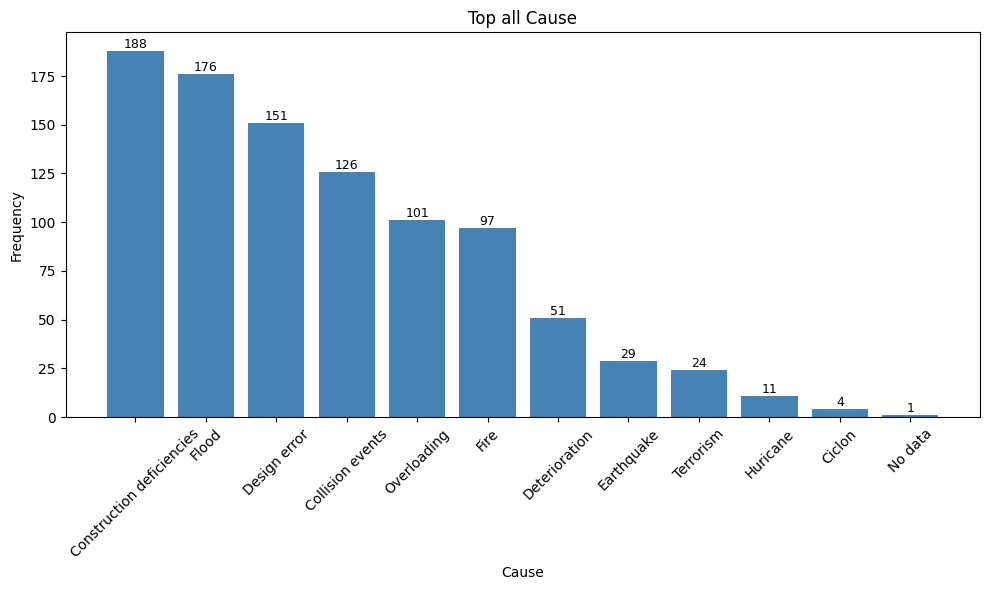

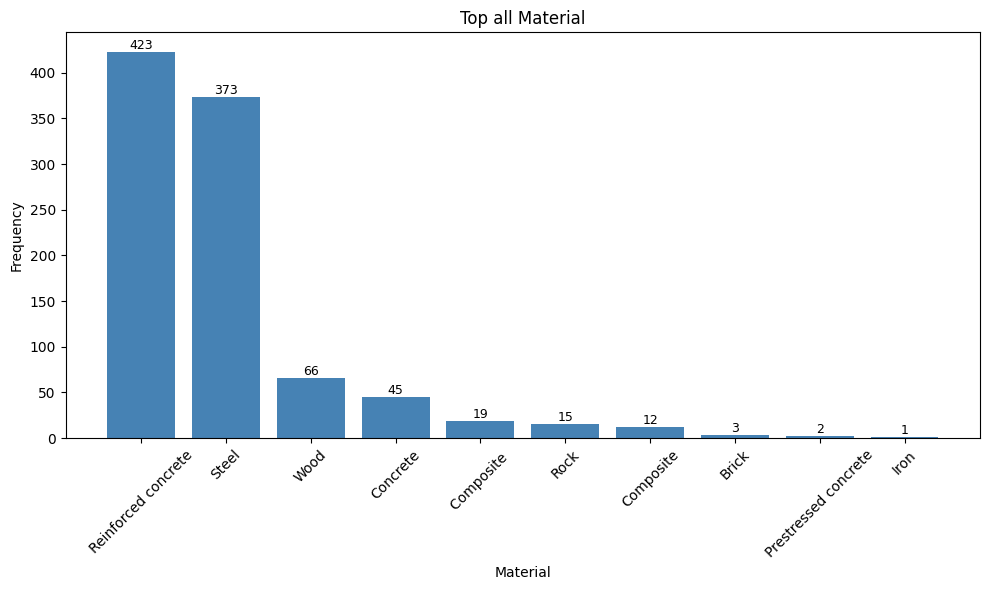

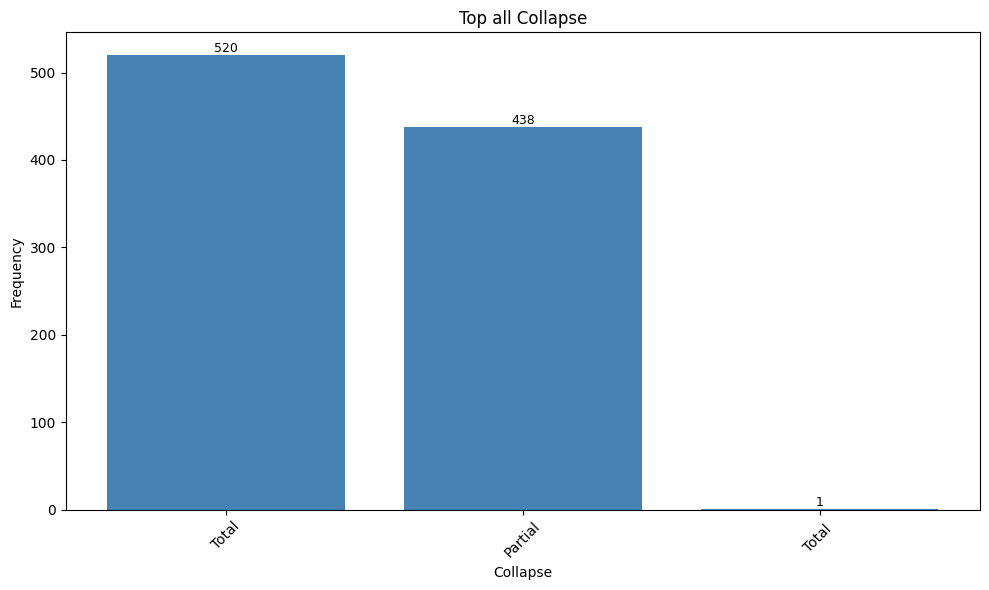

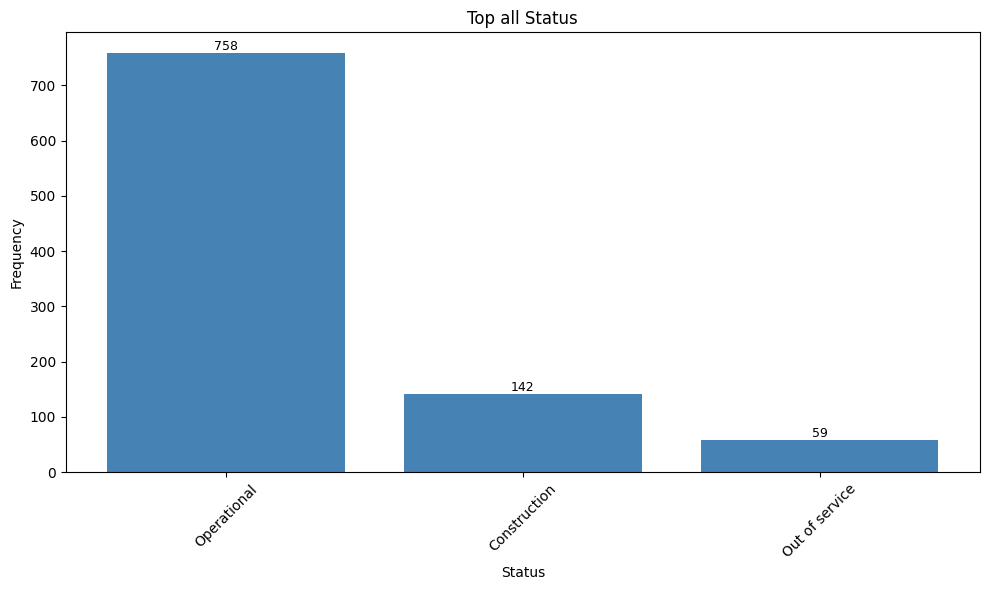

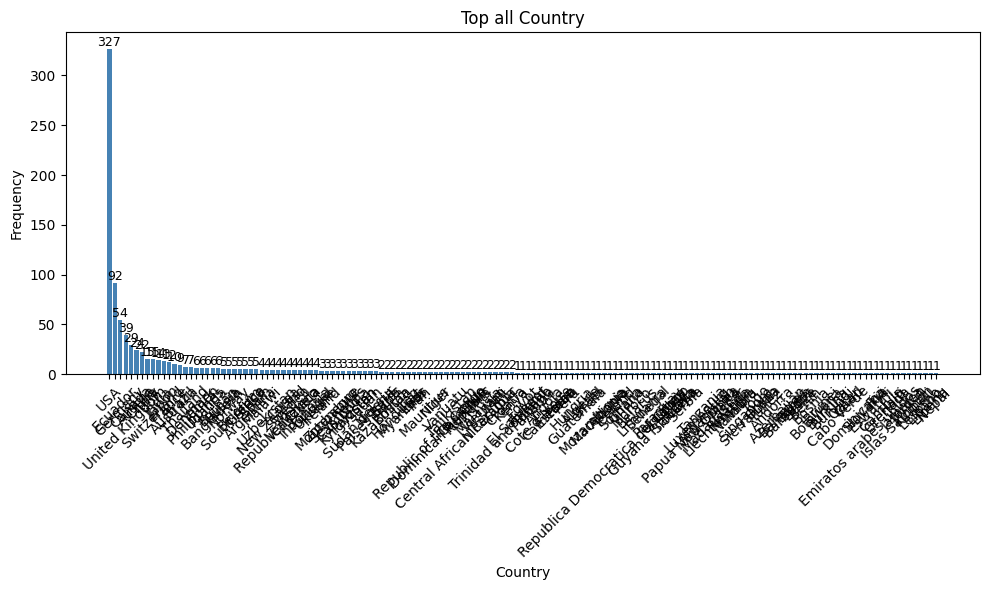

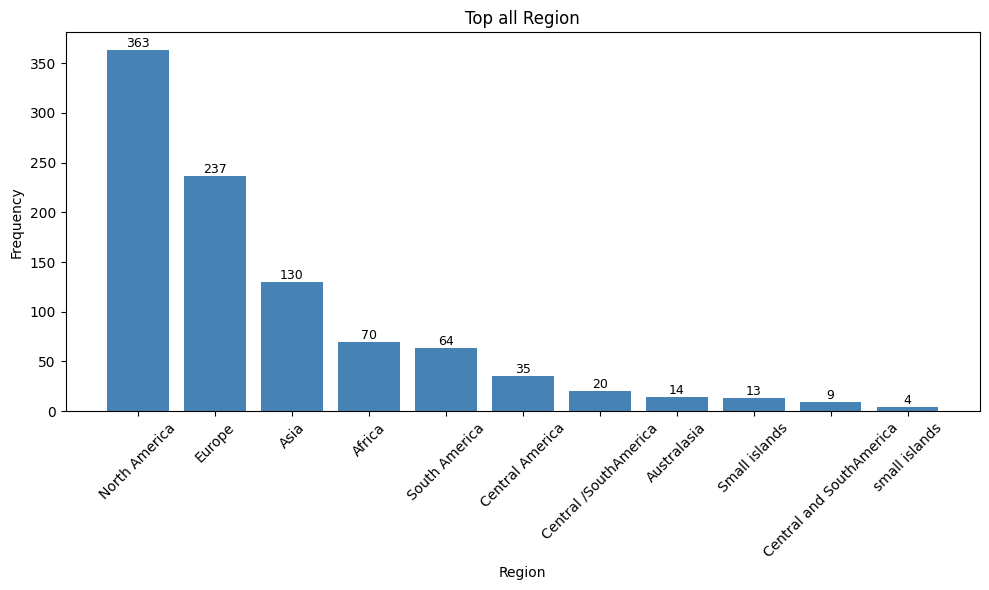

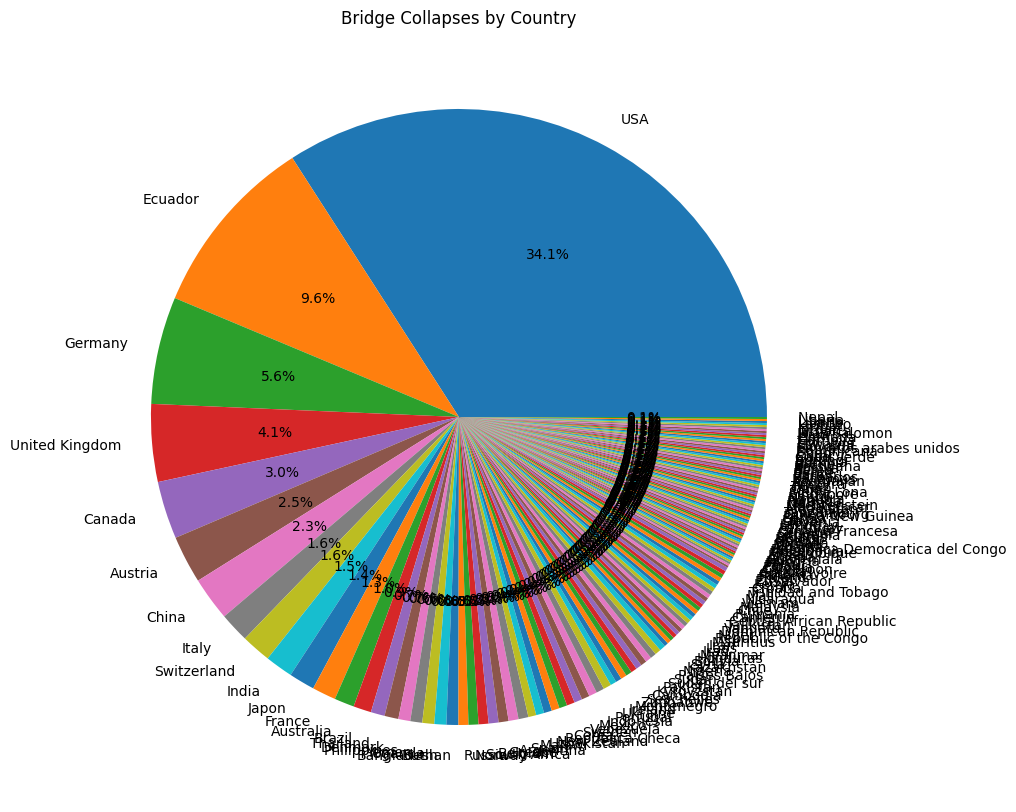

Count de X Type                 840
Cause                840
Material             840
Collapse             840
Status               840
Country              840
Region               840
Date                 840
temperature_1.9      840
temperature_1.9.1    840
temperature_4.5      840
temperature_7.0      824
temperature_8.5      840
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 840 entries, 41 to 1537
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Type               840 non-null    object 
 1   Cause              840 non-null    object 
 2   Material           840 non-null    object 
 3   Collapse           840 non-null    object 
 4   Status             840 non-null    object 
 5   Country            840 non-null    object 
 6   Region             840 non-null    object 
 7   Date               840 non-null    int32  
 8   temperature_1.9    840 non-null    float64
 9   temperature_1.9.

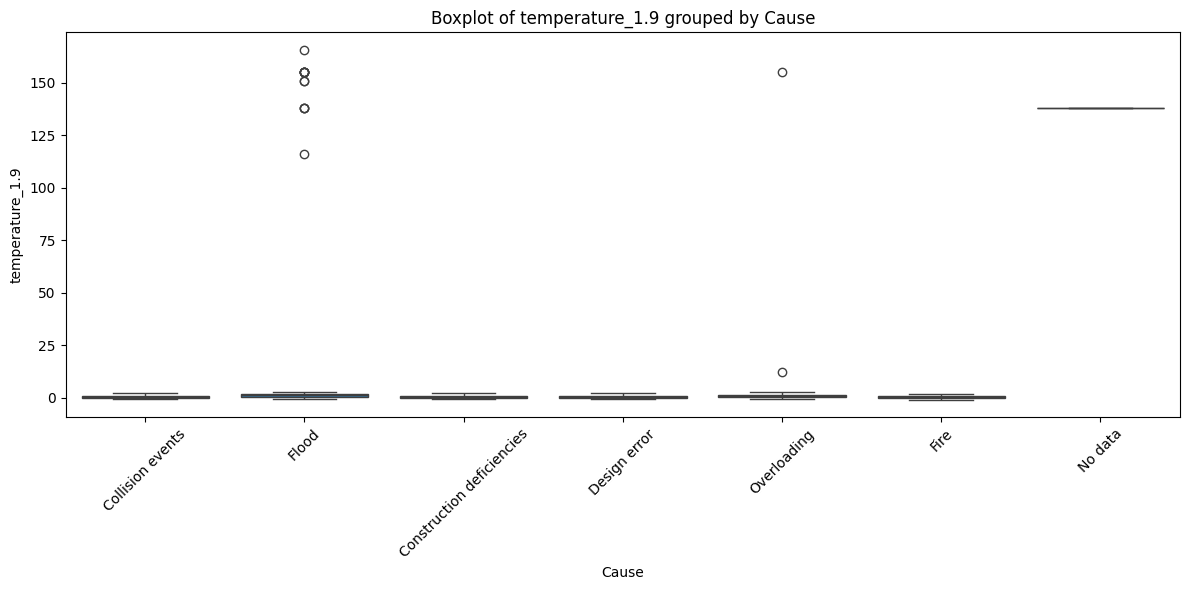

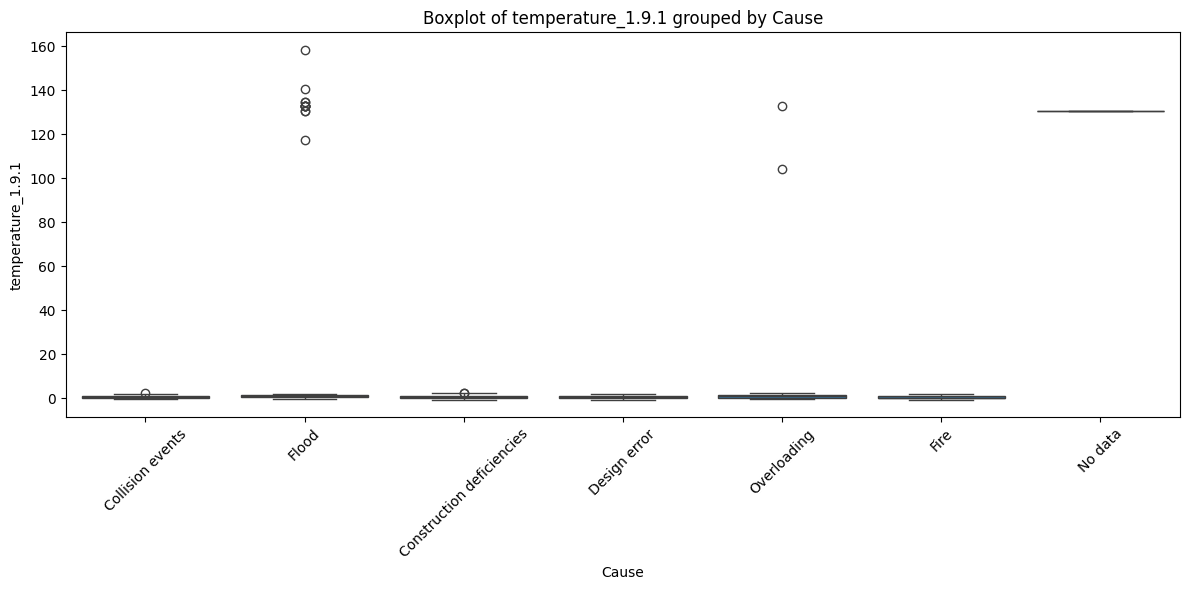

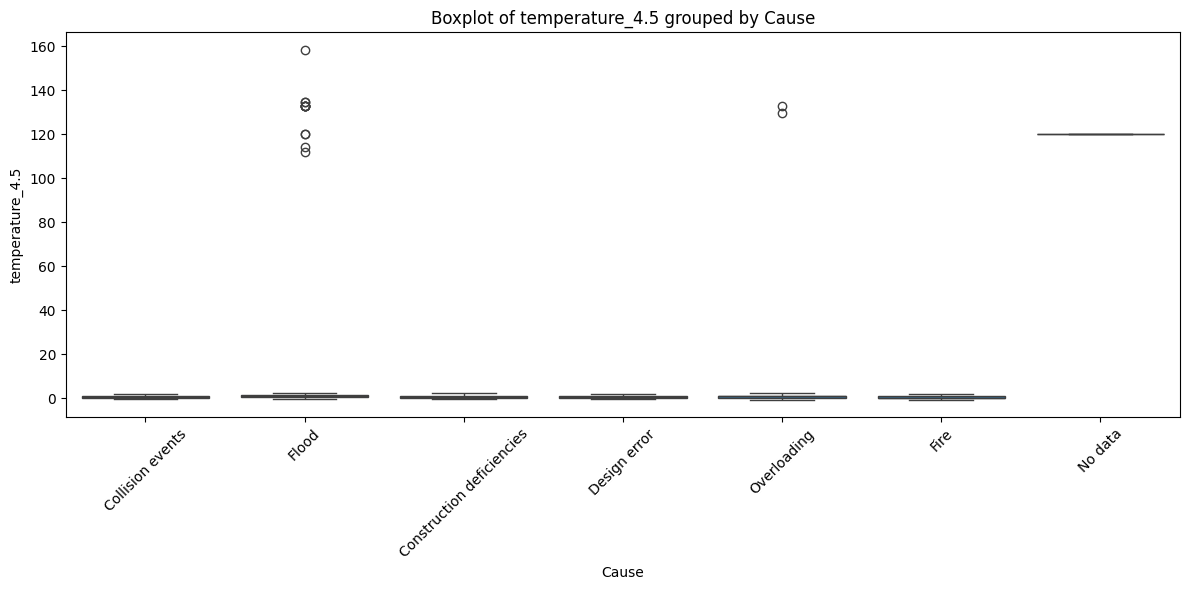

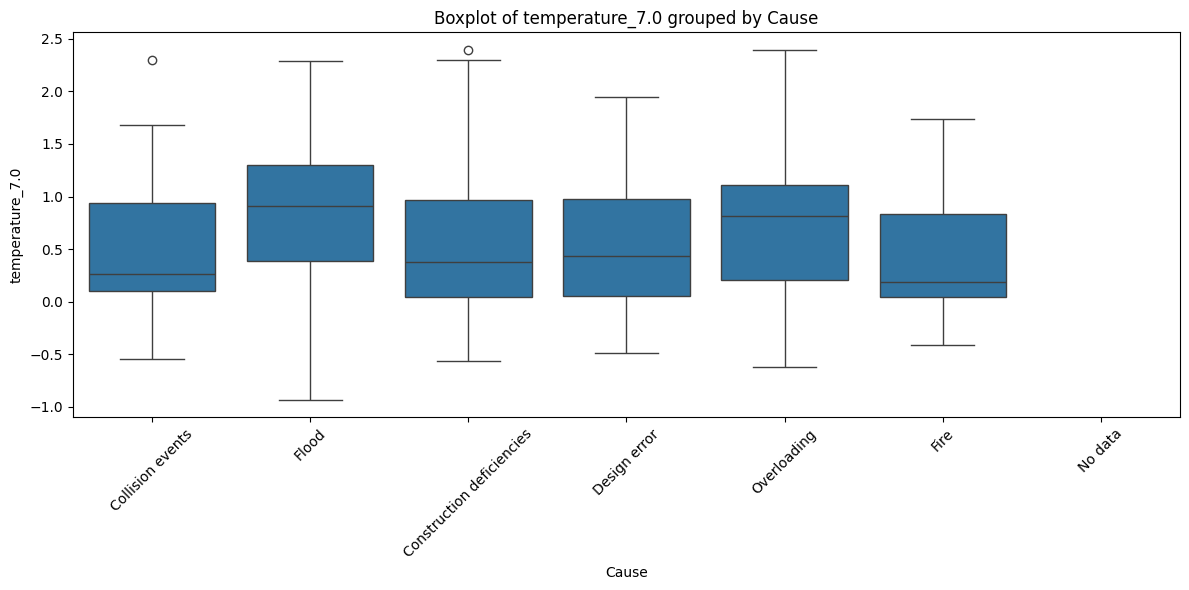

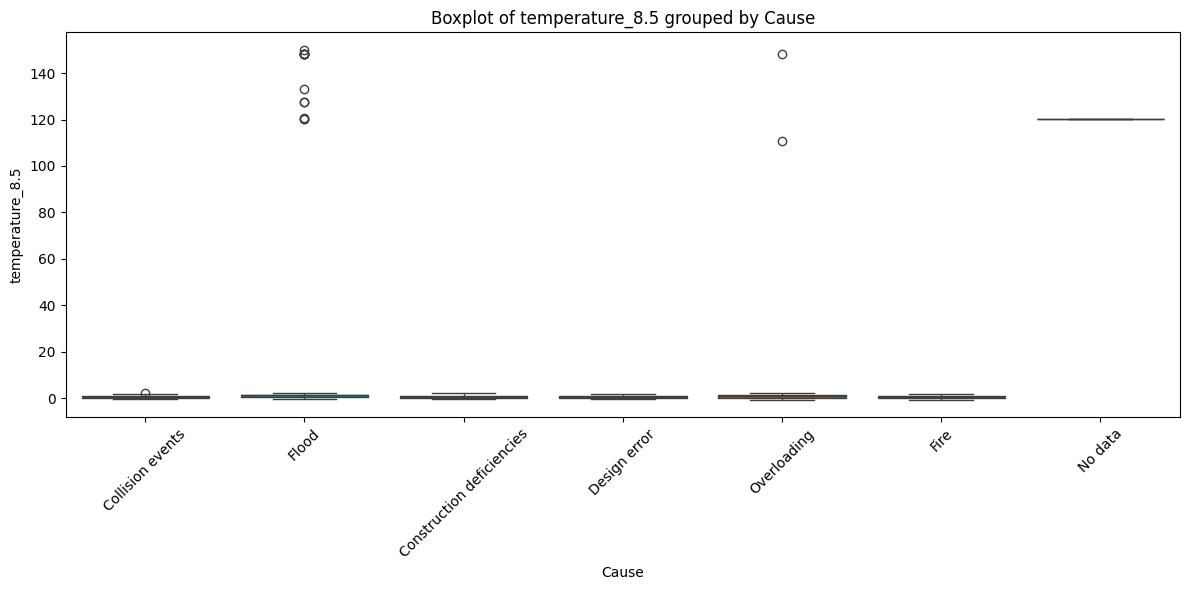

Removing 16 rows identified as outliers.


In [73]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# %%
import pandas as pd

#df2 = pd.read_csv(r'E:\Tesis\Data\raw3.csv', delimiter=';', engine='python')
df2 = pd.read_csv(r'E:\Tesis\Data\raw4.csv', encoding='latin-1')
df2


# %%
df2.rename(columns={
    "SSP1-1.9": "temperature_1.9",
    "SSP1-1.9.1": "temperature_1.9.1",  
    "SSP2-4.5": "temperature_4.5",
    "SSP3-7.0": "temperature_7.0",
    "SSP5-8.5": "temperature_8.5"
}, inplace=True)

# %%
df2.info()

# %%
def compare_not_defined_frequency(df, column_name):
    is_not_defined = df[column_name] == "Not defined"
    
    counts = {
        "Not defined": is_not_defined.sum(),
        "Defined": (~is_not_defined).sum()
    }

    count_series = pd.Series(counts)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=count_series.index, y=count_series.values, palette="pastel")
    plt.title(f"'Not defined' vs Defined values in '{column_name}'")
    plt.ylabel("Count")
    plt.xlabel("Category")
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# %%
import pandas as pd
import matplotlib.pyplot as plt

def stacked_not_defined_comparison(df, columns_to_check):
    # Etiquetas legibles para las temperaturas
    pretty_labels = {
        "temperature_1.9": "SSP1-1.9",
        "temperature_1.9.1": "SSP1-1.9.1",
        "temperature_4.5": "SSP2-4.5",
        "temperature_7.0": "SSP3-7.0",
        "temperature_8.5": "SSP5-8.5",
    }

    data = {
        "Variable": [],
        "Category": [],
        "Count": []
    }

    for col in columns_to_check:
        col_series = df[col]
        
        if pd.api.types.is_numeric_dtype(col_series):
            not_defined_count = col_series.isna().sum()
        else:
            col_series = col_series.astype(str).str.strip()
            not_defined_count = col_series.isin(["Not defined", "No definido", "#N/A", "ER"]).sum() + col_series.isna().sum()

        defined_count = df.shape[0] - not_defined_count

        data["Variable"].extend([col, col])
        data["Category"].extend(["No definido", "Definido"])
        data["Count"].extend([not_defined_count, defined_count])

    plot_df = pd.DataFrame(data)

    pivot_df = plot_df.pivot(index="Variable", columns="Category", values="Count").fillna(0)

    for cat in ["No definido", "Definido"]:
        if cat not in pivot_df.columns:
            pivot_df[cat] = 0
    pivot_df = pivot_df[["No definido", "Definido"]]

    # Cambiar nombres por etiquetas legibles
    pivot_df = pivot_df.rename(index=pretty_labels)

    # Graficar
    ax = pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6), color=["salmon", "lightgreen"])
    plt.title("Valores Definidos vs No definidos por variable")
    plt.ylabel("Cantidad")
    plt.xlabel("Variable")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Categoría")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)

    for i, variable in enumerate(pivot_df.index):
        total = pivot_df.loc[variable].sum()
        y_offset = 0
        for category in pivot_df.columns:
            value = pivot_df.loc[variable, category]
            if value > 0:
                percent = (value / total) * 100
                ax.text(i, y_offset + value / 2, f"{percent:.1f}%", ha='center', va='center',
                        fontsize=9, color='black', fontweight='bold')
                y_offset += value

    plt.tight_layout()
    plt.show()


# %%
cat_cols=['Type','Cause','Material','Collapse','Status','Country','Region']

num_cols = [
    'Date',
    'temperature_1.9',
    'temperature_1.9.1',
    'temperature_4.5',
    'temperature_7.0',
    'temperature_8.5'
]



df2=df2.dropna()
df2=df2.drop(columns=['Name','Sub-region'])

target=['Cause']

features=cat_cols+num_cols
X=df2[features].copy()


stacked_not_defined_comparison(X, features)


# %%
X = X[
    (X['Type'] != "Not defined") &
    (X['Material'] != "Not defined") &
    (X['Cause'] != "No definido") &
    (X['Date'] != 'No date') &
    (X['Date'] != 'no date') &
    (X['temperature_1.9'] != "ER") &
    (X['temperature_1.9'] != "#N/A") &
    (X['temperature_1.9.1'] != "ER") &
    (X['temperature_1.9.1'] != "#N/A") &
    (X['temperature_4.5'] != "ER") &
    (X['temperature_4.5'] != "#N/A") &
    (X['temperature_7.0'] != "ER") &
    (X['temperature_7.0'] != "#N/A") &
    (X['temperature_8.5'] != "ER") &
    (X['temperature_8.5'] != "#N/A")
]


X['Date']=pd.to_datetime(X['Date'],errors='coerce').dt.year
X=X.dropna(subset=['Date'])




# %%
stacked_not_defined_comparison(X, features)

# %%
len(X)

# %%
temperature_columns = [
    'temperature_1.9',
    'temperature_1.9.1',
    'temperature_4.5',
    'temperature_7.0',
    'temperature_8.5'
]

for col in temperature_columns:
    X[col] = (
        X[col]
        .astype(str)
        .str.replace(',', '.', regex=False)
        .str.replace(r'[^\d\.\-]', '', regex=True)
        .str.strip()
    )

X[temperature_columns] = X[temperature_columns].apply(pd.to_numeric, errors='coerce')


# %% [markdown]
# # Frecuencias
# 

# %%
df=X

# %%
plt.figure(figsize=(10,6))
sns.histplot(df['Date'].dropna(), bins=30, kde=False)
plt.xlabel('Año de colapso')
plt.ylabel('Numero de colapsos')
plt.title('Histograma de colapsos por año')
plt.grid(True)
plt.show()


# %%
import matplotlib.pyplot as plt

def plot_top_values(df, column, n=None):
    if n is None:
        values = df[column].value_counts()
    else:
        values = df[column].value_counts().head(n)
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(values.index, values.values, color='steelblue')
    
    # Add labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # x position (center of bar)
            height,                             # y position (top of bar)
            str(height),                        # text
            ha='center', va='bottom', fontsize=9
        )
    
    plt.title('Top ' + (str(n) if n else 'all') + ' ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# %%
temp_cat_cols=cat_cols.copy()
temp_cat_cols.append("Cause")

for column in cat_cols:
    plot_top_values(df,column)


# %%

country_counts = df['Country'].value_counts()
country_counts.plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')
plt.title('Bridge Collapses by Country')
plt.ylabel('')
plt.show()

# %% [markdown]
# # Eliminacion de Outliers

# %%

temp_df=X

## Eliminacion de Causes que tienen pocos valores

X = X[~X['Cause'].isin(["Ciclon", "Huricane", "Terrorism", "Deterioration",'Earthquake'])]



Y=X['Cause'].copy()

cat_cols.remove("Country")
cat_cols.remove("Region")
cat_cols.remove("Status")

temp_df=X


# %%
print("Count de X "+str(X.count()))

# %%
X.info()

# %%
temp_df

# %%
temp_df.info()

# %%
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots_for_floats(df):
    float_cols = df.select_dtypes(include='float').columns

    for col in float_cols:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x='Cause', y=col)
        plt.xticks(rotation=45)
        plt.title(f'Boxplot of {col} grouped by Cause')
        plt.tight_layout()
        plt.show()


# %%
plot_boxplots_for_floats(temp_df)


# %%
def get_outlier_indices(df, cols):
    outlier_indices = set()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Get indices of outliers in this column
        outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices.update(outliers_col)
    return outlier_indices

def remove_outliers(df):
    float_cols = df.select_dtypes(include='float').columns
    outlier_indices = get_outlier_indices(df, float_cols)
    print(f"Removing {len(outlier_indices)} rows identified as outliers.")
    return df.drop(index=outlier_indices)

temp_df = remove_outliers(temp_df)

root_df=temp_df

temp_df=temp_df.drop(columns=['Country','Region','Status','Date'])



# TESTTT

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   N°                 1538 non-null   int64 
 1   Date               1538 non-null   object
 2   Name               1538 non-null   object
 3   Type               1538 non-null   object
 4   Cause              1538 non-null   object
 5   Material           1538 non-null   object
 6   Collapse           1538 non-null   object
 7   Status             1538 non-null   object
 8   Country            1538 non-null   object
 9   Region             1538 non-null   object
 10  Sub-region         1538 non-null   object
 11  temperature_1.9    1528 non-null   object
 12  temperature_1.9.1  1528 non-null   object
 13  temperature_4.5    1528 non-null   object
 14  temperature_7.0    1528 non-null   object
 15  temperature_8.5    1528 non-null   object
dtypes: int64(1), object(15)
memory usage: 192.

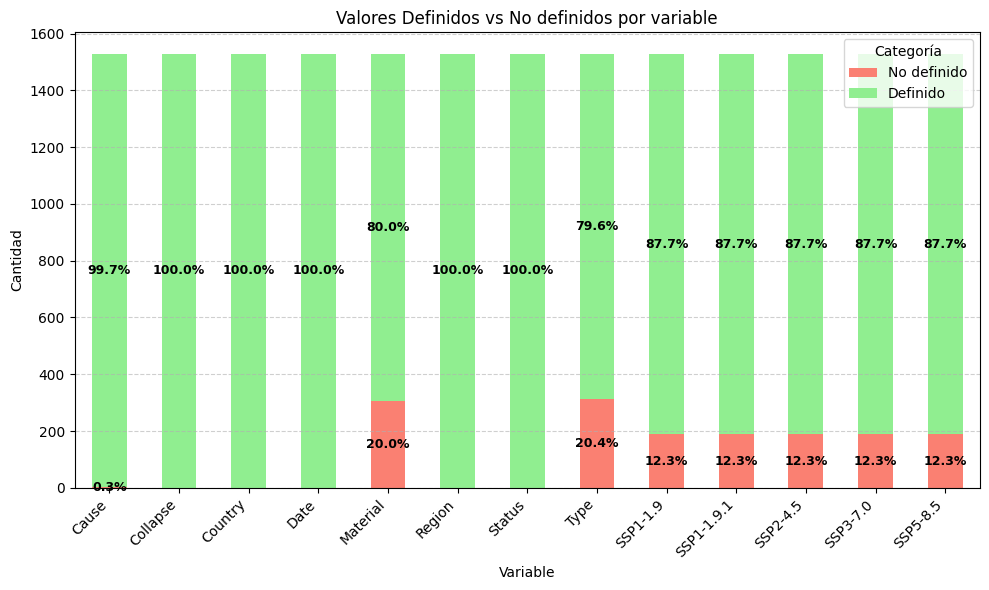

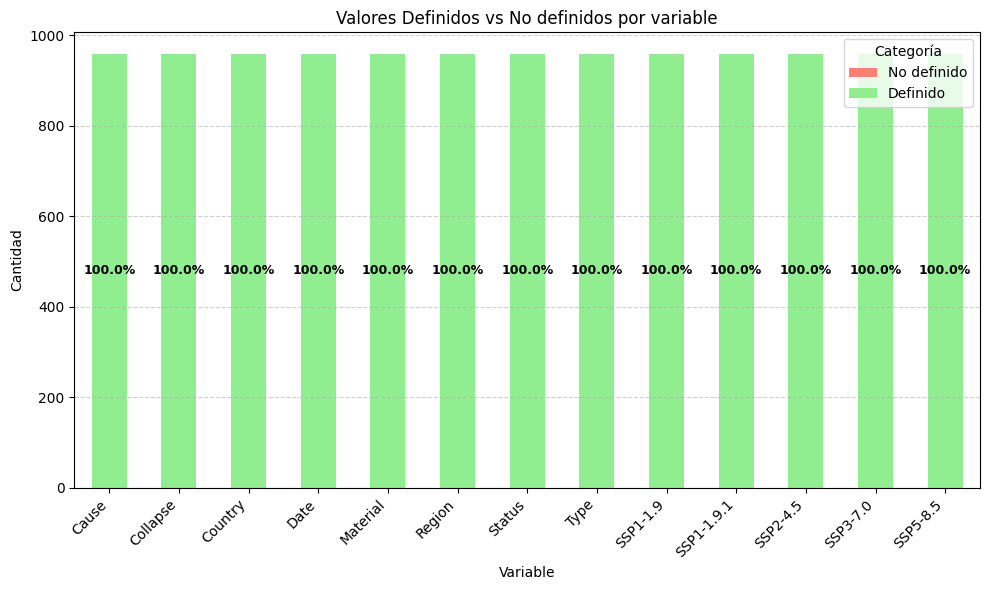

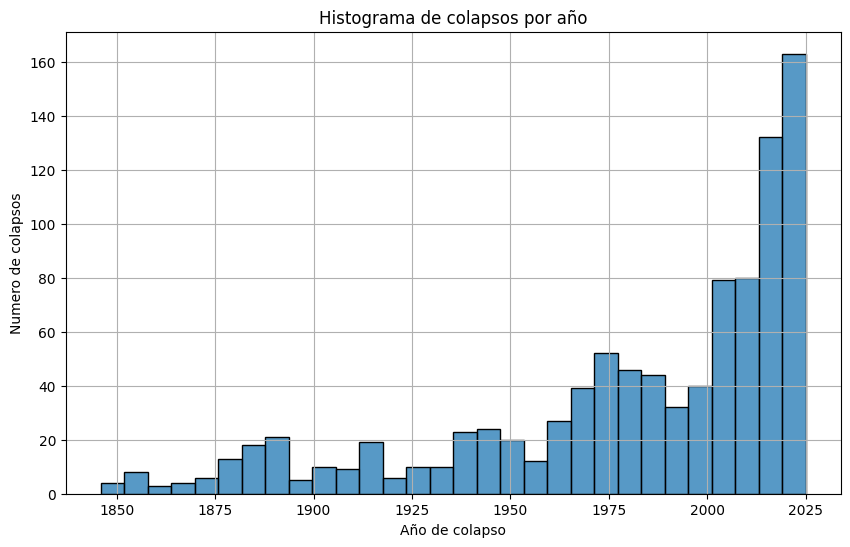

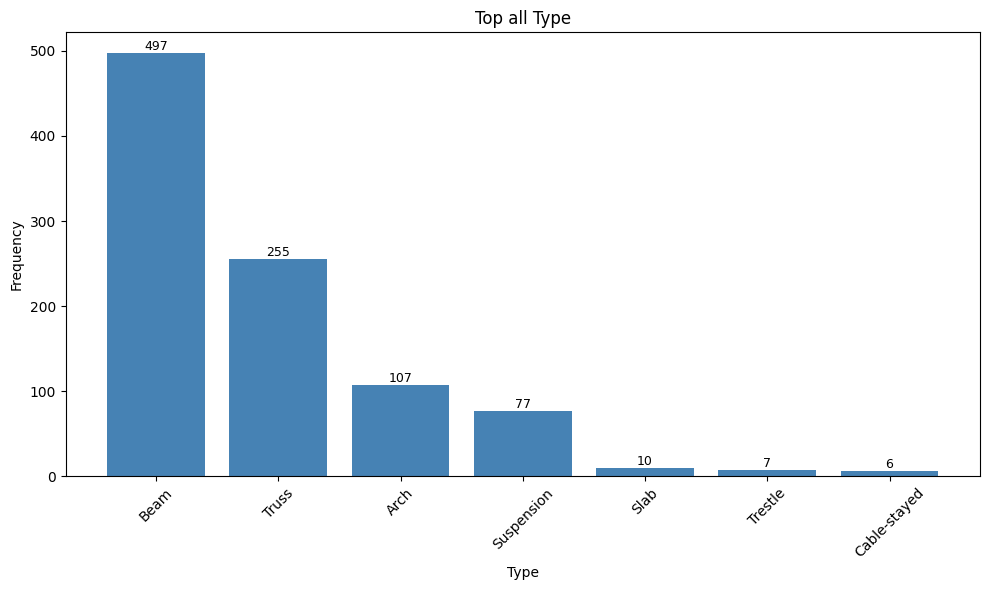

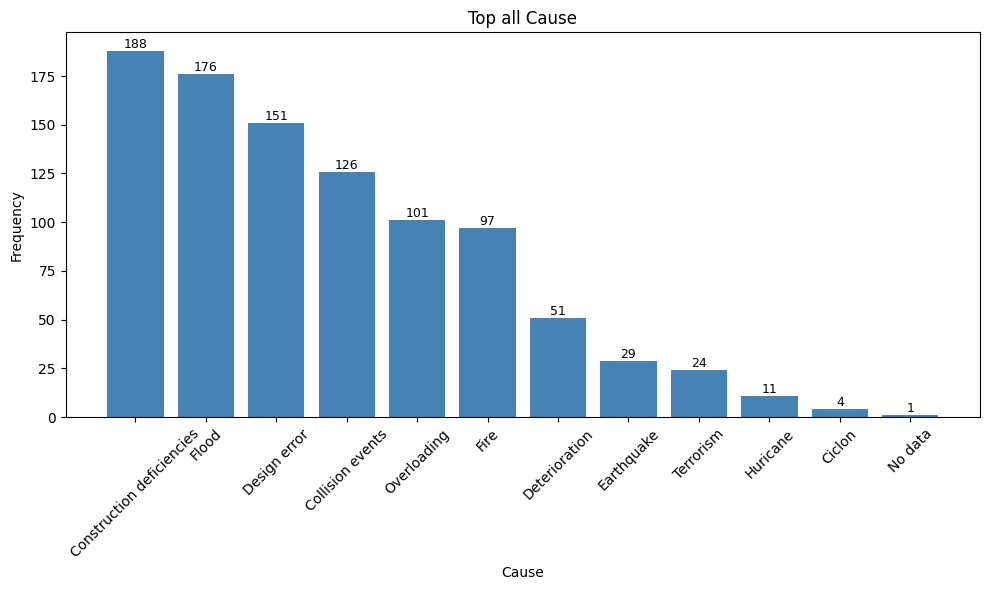

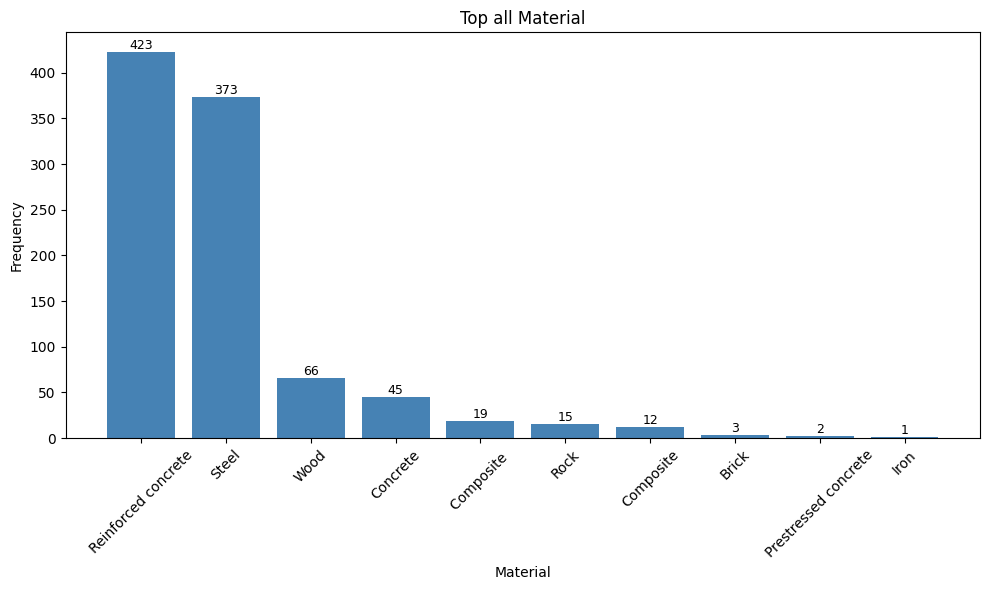

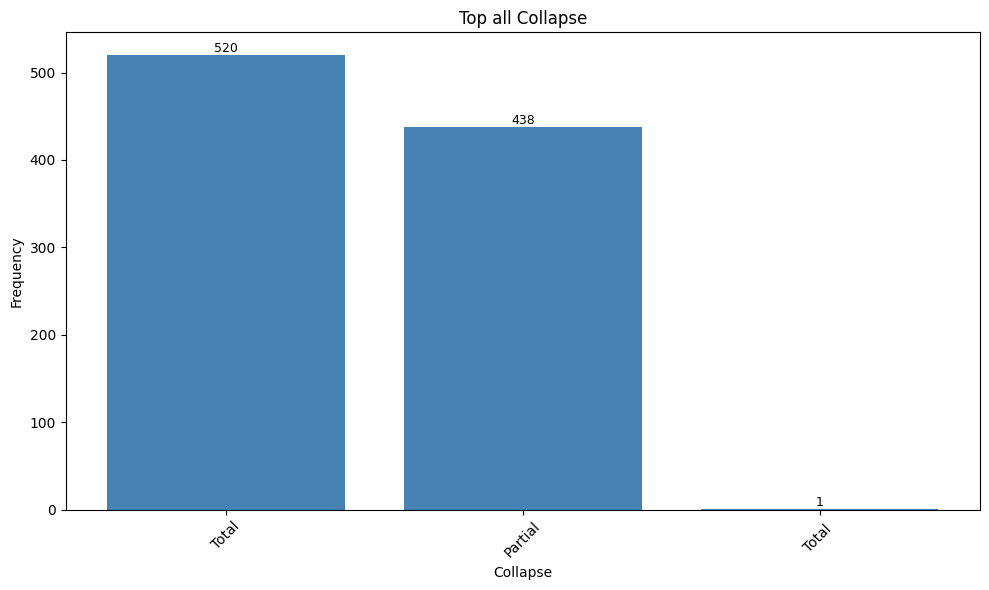

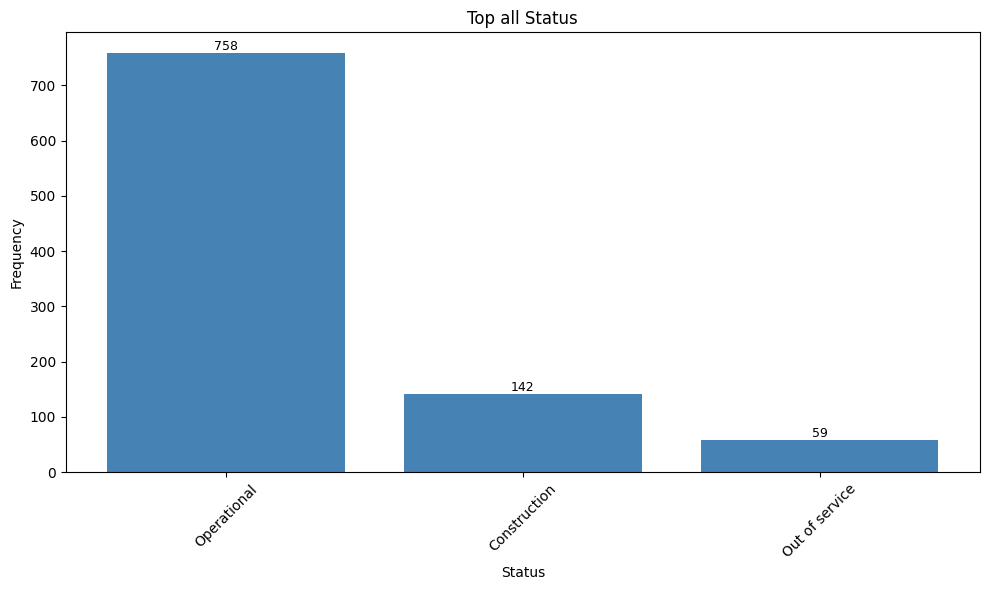

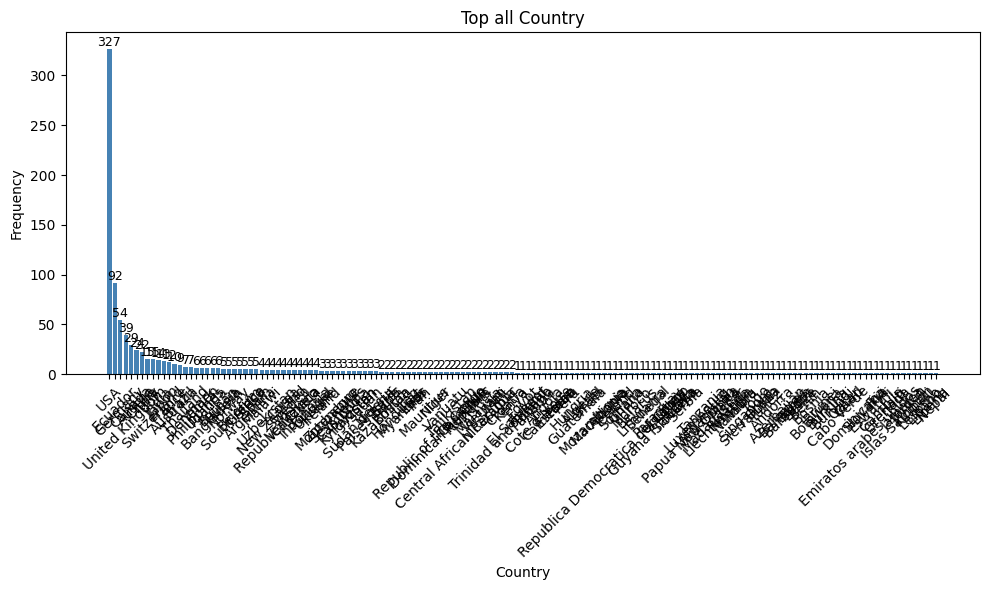

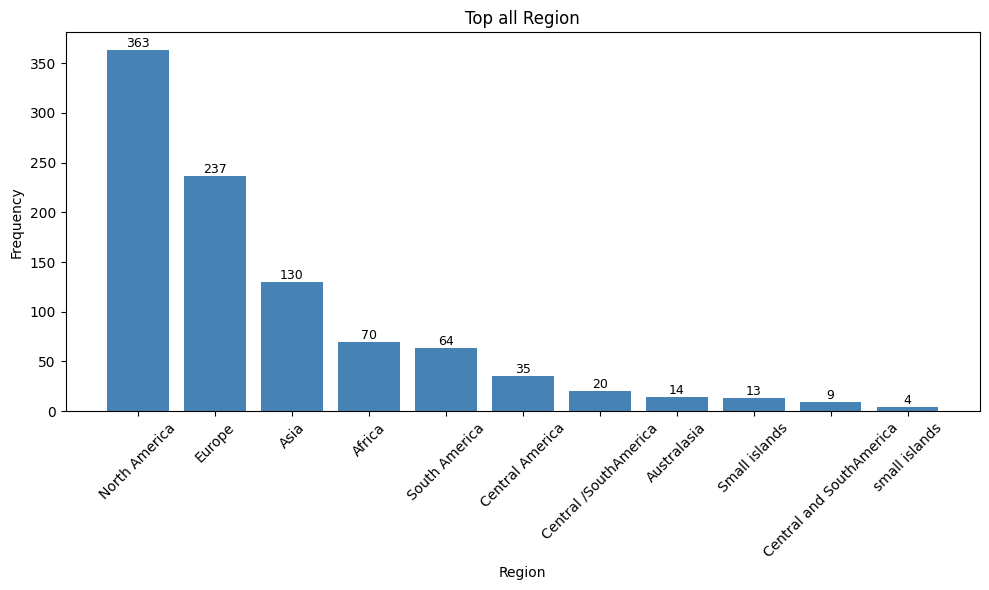

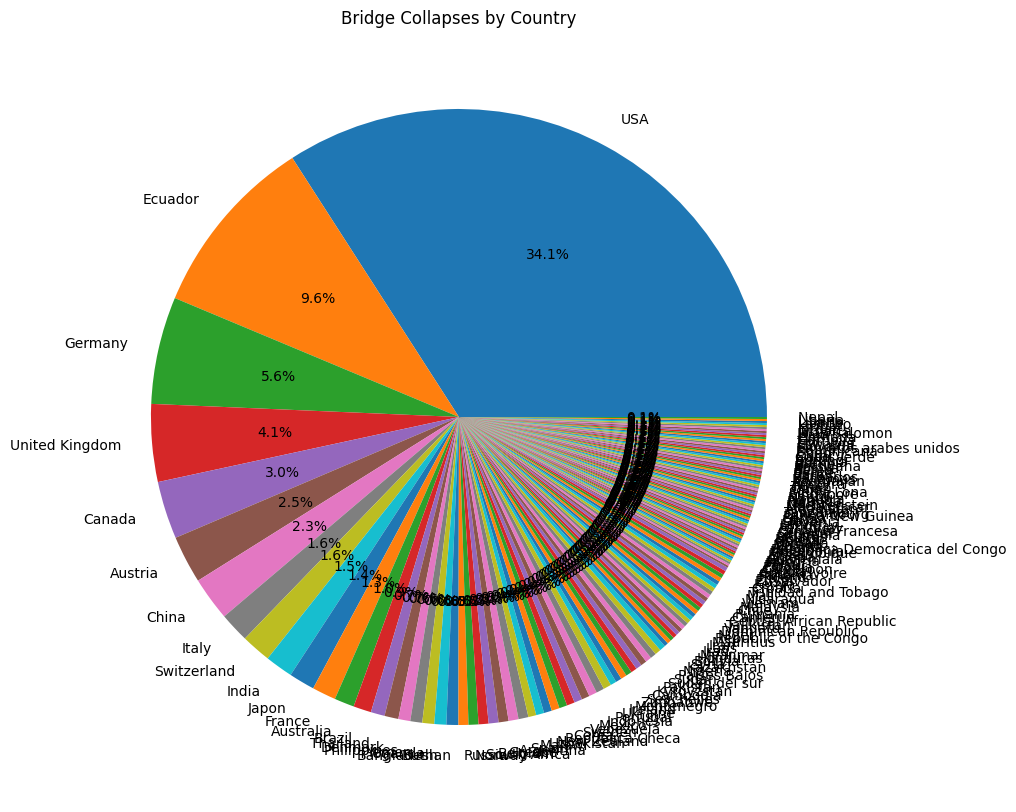

Count de X Type                 840
Cause                840
Material             840
Collapse             840
Status               840
Country              840
Region               840
Date                 840
temperature_1.9      840
temperature_1.9.1    840
temperature_4.5      840
temperature_7.0      824
temperature_8.5      840
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 840 entries, 41 to 1537
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Type               840 non-null    object 
 1   Cause              840 non-null    object 
 2   Material           840 non-null    object 
 3   Collapse           840 non-null    object 
 4   Status             840 non-null    object 
 5   Country            840 non-null    object 
 6   Region             840 non-null    object 
 7   Date               840 non-null    int32  
 8   temperature_1.9    840 non-null    float64
 9   temperature_1.9.

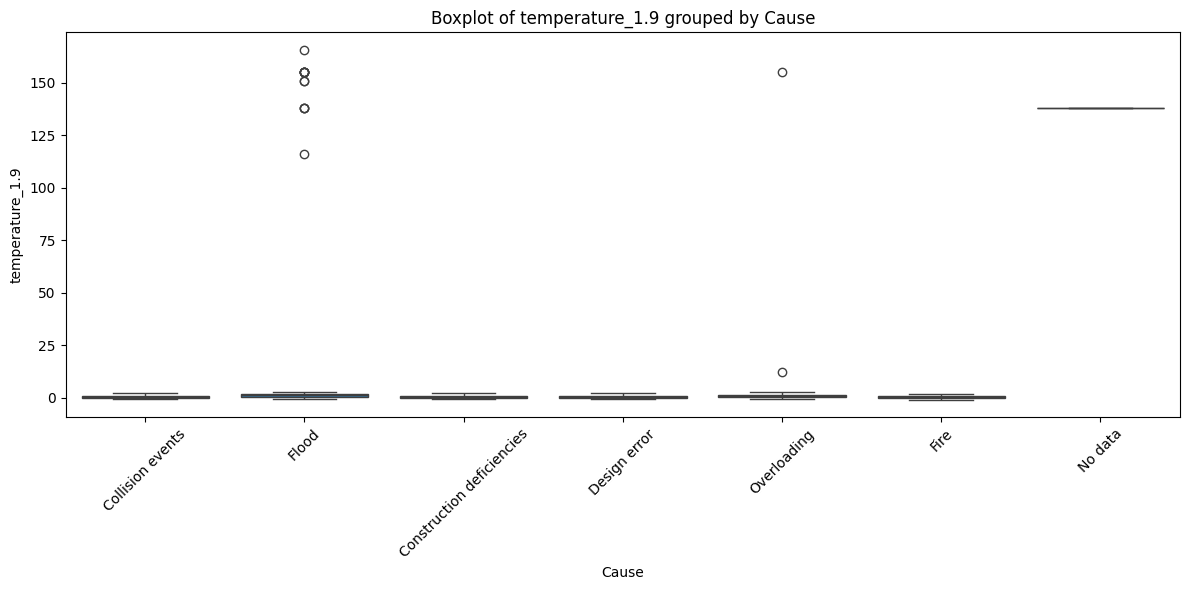

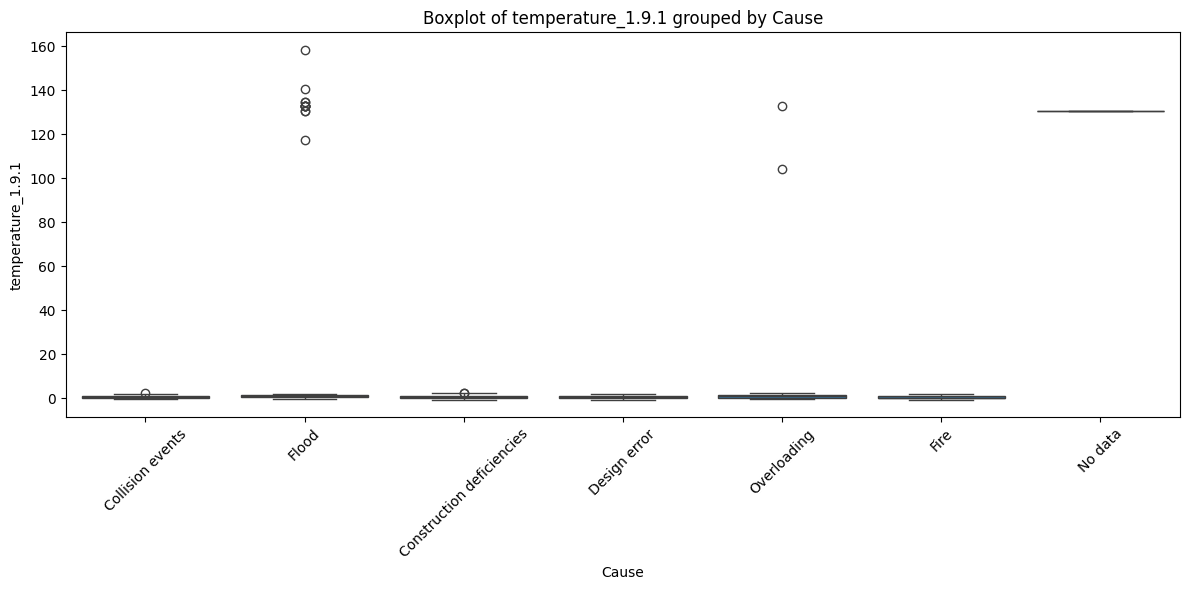

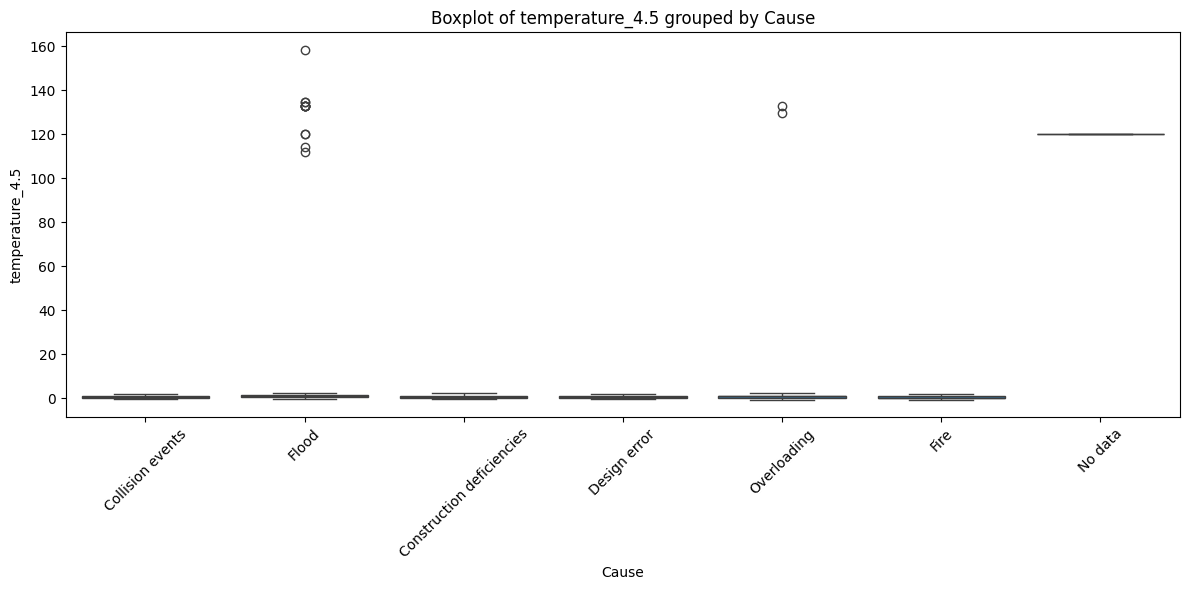

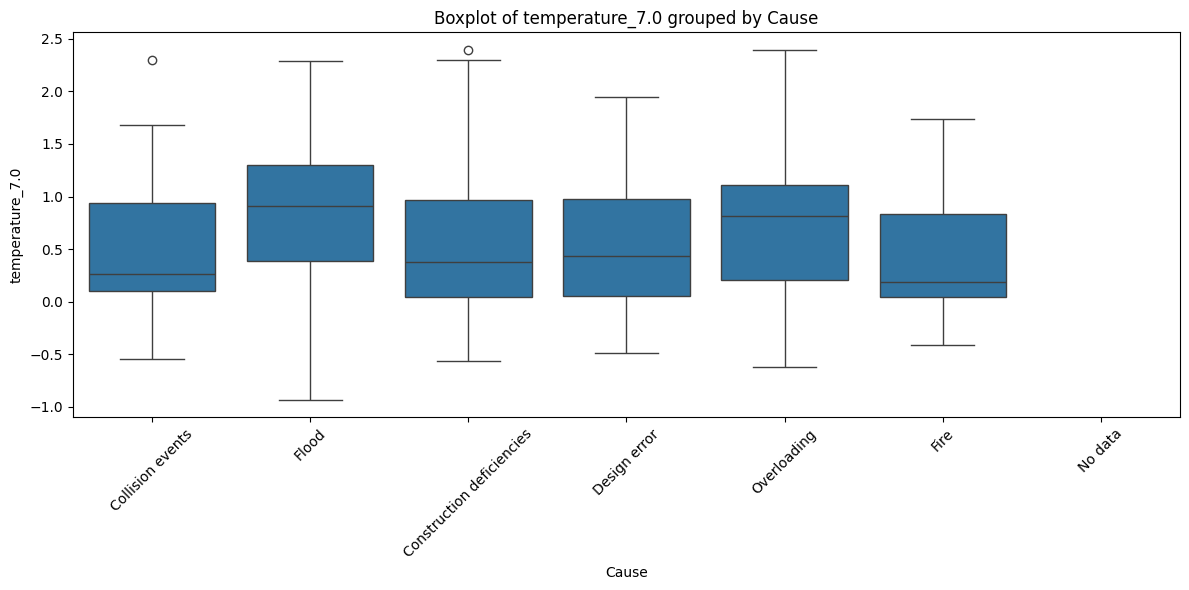

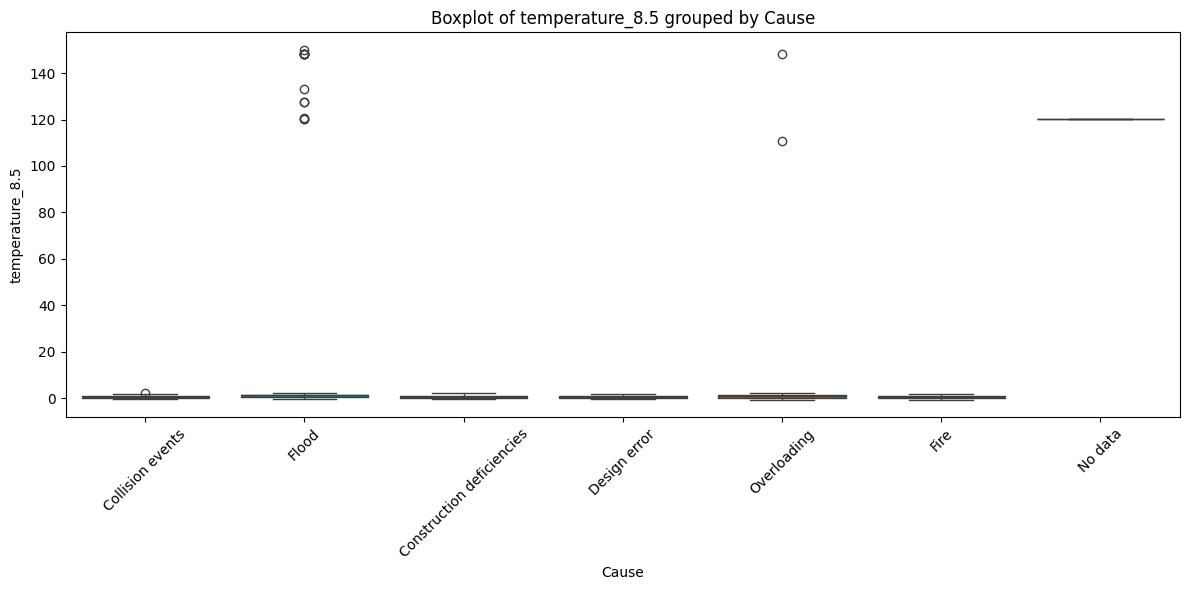

Removing 16 rows identified as outliers.


In [20]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# %%
import pandas as pd

#df2 = pd.read_csv(r'E:\Tesis\Data\raw3.csv', delimiter=';', engine='python')
df2 = pd.read_csv(r'E:\Tesis\Data\raw4.csv', encoding='latin-1')
df2


# %%
df2.rename(columns={
    "SSP1-1.9": "temperature_1.9",
    "SSP1-1.9.1": "temperature_1.9.1",  
    "SSP2-4.5": "temperature_4.5",
    "SSP3-7.0": "temperature_7.0",
    "SSP5-8.5": "temperature_8.5"
}, inplace=True)

# %%
df2.info()

# %%
def compare_not_defined_frequency(df, column_name):
    is_not_defined = df[column_name] == "Not defined"
    
    counts = {
        "Not defined": is_not_defined.sum(),
        "Defined": (~is_not_defined).sum()
    }

    count_series = pd.Series(counts)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=count_series.index, y=count_series.values, palette="pastel")
    plt.title(f"'Not defined' vs Defined values in '{column_name}'")
    plt.ylabel("Count")
    plt.xlabel("Category")
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# %%
import pandas as pd
import matplotlib.pyplot as plt

def stacked_not_defined_comparison(df, columns_to_check):
    # Etiquetas legibles para las temperaturas
    pretty_labels = {
        "temperature_1.9": "SSP1-1.9",
        "temperature_1.9.1": "SSP1-1.9.1",
        "temperature_4.5": "SSP2-4.5",
        "temperature_7.0": "SSP3-7.0",
        "temperature_8.5": "SSP5-8.5",
    }

    data = {
        "Variable": [],
        "Category": [],
        "Count": []
    }

    for col in columns_to_check:
        col_series = df[col]
        
        if pd.api.types.is_numeric_dtype(col_series):
            not_defined_count = col_series.isna().sum()
        else:
            col_series = col_series.astype(str).str.strip()
            not_defined_count = col_series.isin(["Not defined", "No definido", "#N/A", "ER"]).sum() + col_series.isna().sum()

        defined_count = df.shape[0] - not_defined_count

        data["Variable"].extend([col, col])
        data["Category"].extend(["No definido", "Definido"])
        data["Count"].extend([not_defined_count, defined_count])

    plot_df = pd.DataFrame(data)

    pivot_df = plot_df.pivot(index="Variable", columns="Category", values="Count").fillna(0)

    for cat in ["No definido", "Definido"]:
        if cat not in pivot_df.columns:
            pivot_df[cat] = 0
    pivot_df = pivot_df[["No definido", "Definido"]]

    # Cambiar nombres por etiquetas legibles
    pivot_df = pivot_df.rename(index=pretty_labels)

    # Graficar
    ax = pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6), color=["salmon", "lightgreen"])
    plt.title("Valores Definidos vs No definidos por variable")
    plt.ylabel("Cantidad")
    plt.xlabel("Variable")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Categoría")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)

    for i, variable in enumerate(pivot_df.index):
        total = pivot_df.loc[variable].sum()
        y_offset = 0
        for category in pivot_df.columns:
            value = pivot_df.loc[variable, category]
            if value > 0:
                percent = (value / total) * 100
                ax.text(i, y_offset + value / 2, f"{percent:.1f}%", ha='center', va='center',
                        fontsize=9, color='black', fontweight='bold')
                y_offset += value

    plt.tight_layout()
    plt.show()


# %%
cat_cols=['Type','Cause','Material','Collapse','Status','Country','Region']

num_cols = [
    'Date',
    'temperature_1.9',
    'temperature_1.9.1',
    'temperature_4.5',
    'temperature_7.0',
    'temperature_8.5'
]



df2=df2.dropna()
df2=df2.drop(columns=['Name','Sub-region'])

target=['Cause']

features=cat_cols+num_cols
X=df2[features].copy()


stacked_not_defined_comparison(X, features)


# %%
X = X[
    (X['Type'] != "Not defined") &
    (X['Material'] != "Not defined") &
    (X['Cause'] != "No definido") &
    (X['Date'] != 'No date') &
    (X['Date'] != 'no date') &
    (X['temperature_1.9'] != "ER") &
    (X['temperature_1.9'] != "#N/A") &
    (X['temperature_1.9.1'] != "ER") &
    (X['temperature_1.9.1'] != "#N/A") &
    (X['temperature_4.5'] != "ER") &
    (X['temperature_4.5'] != "#N/A") &
    (X['temperature_7.0'] != "ER") &
    (X['temperature_7.0'] != "#N/A") &
    (X['temperature_8.5'] != "ER") &
    (X['temperature_8.5'] != "#N/A")
]


X['Date']=pd.to_datetime(X['Date'],errors='coerce').dt.year
X=X.dropna(subset=['Date'])




# %%
stacked_not_defined_comparison(X, features)

# %%
len(X)

# %%
temperature_columns = [
    'temperature_1.9',
    'temperature_1.9.1',
    'temperature_4.5',
    'temperature_7.0',
    'temperature_8.5'
]

for col in temperature_columns:
    X[col] = (
        X[col]
        .astype(str)
        .str.replace(',', '.', regex=False)
        .str.replace(r'[^\d\.\-]', '', regex=True)
        .str.strip()
    )

X[temperature_columns] = X[temperature_columns].apply(pd.to_numeric, errors='coerce')


# %% [markdown]
# # Frecuencias
# 

# %%
df=X

# %%
plt.figure(figsize=(10,6))
sns.histplot(df['Date'].dropna(), bins=30, kde=False)
plt.xlabel('Año de colapso')
plt.ylabel('Numero de colapsos')
plt.title('Histograma de colapsos por año')
plt.grid(True)
plt.show()


# %%
import matplotlib.pyplot as plt

def plot_top_values(df, column, n=None):
    if n is None:
        values = df[column].value_counts()
    else:
        values = df[column].value_counts().head(n)
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(values.index, values.values, color='steelblue')
    
    # Add labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # x position (center of bar)
            height,                             # y position (top of bar)
            str(height),                        # text
            ha='center', va='bottom', fontsize=9
        )
    
    plt.title('Top ' + (str(n) if n else 'all') + ' ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# %%
temp_cat_cols=cat_cols.copy()
temp_cat_cols.append("Cause")

for column in cat_cols:
    plot_top_values(df,column)


# %%

country_counts = df['Country'].value_counts()
country_counts.plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')
plt.title('Bridge Collapses by Country')
plt.ylabel('')
plt.show()

# %% [markdown]
# # Eliminacion de Outliers

# %%

temp_df=X

## Eliminacion de Causes que tienen pocos valores

X = X[~X['Cause'].isin(["Ciclon", "Huricane", "Terrorism", "Deterioration",'Earthquake'])]



Y=X['Cause'].copy()

cat_cols.remove("Country")
cat_cols.remove("Region")
cat_cols.remove("Status")

temp_df=X


# %%
print("Count de X "+str(X.count()))

# %%
X.info()

# %%
temp_df

# %%
temp_df.info()

# %%
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots_for_floats(df):
    float_cols = df.select_dtypes(include='float').columns

    for col in float_cols:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x='Cause', y=col)
        plt.xticks(rotation=45)
        plt.title(f'Boxplot of {col} grouped by Cause')
        plt.tight_layout()
        plt.show()


# %%
plot_boxplots_for_floats(temp_df)


# %%
def get_outlier_indices(df, cols):
    outlier_indices = set()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Get indices of outliers in this column
        outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices.update(outliers_col)
    return outlier_indices

def remove_outliers(df):
    float_cols = df.select_dtypes(include='float').columns
    outlier_indices = get_outlier_indices(df, float_cols)
    print(f"Removing {len(outlier_indices)} rows identified as outliers.")
    return df.drop(index=outlier_indices)

temp_df = remove_outliers(temp_df)

root_df=temp_df

temp_df=temp_df.drop(columns=['Region','Status','Date','Collapse'])



In [21]:
Y_NS=Y
X_NS=X

In [22]:
Y

41      Collision events
43      Collision events
45      Collision events
46      Collision events
48      Collision events
              ...       
1526         Overloading
1528               Flood
1530               Flood
1536         Overloading
1537               Flood
Name: Cause, Length: 840, dtype: object

In [23]:
Y=temp_df['Cause']

In [24]:
temp_df_no_cause=temp_df.drop('Cause',axis=1)
temp_df_no_cause

,Type,Material,Country,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5
41,Beam,Reinforced concrete,Germany,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865
43,Truss,Steel,Germany,0.96894,1.784090,1.65721,1.445855,1.41198
45,Truss,Steel,Germany,0.40503,0.348125,0.21938,0.244370,0.21938
46,Suspension,Wood,Germany,-0.37668,0.055205,-0.03791,-0.281860,-0.05782
48,Beam,Reinforced concrete,Germany,-0.01883,0.183450,0.26149,0.136105,0.11345
...,...,...,...,...,...,...,...,...
1501,Beam,Reinforced concrete,Jordan,1.06424,0.899050,1.01453,1.045700,1.01453
1503,Beam,Composite,Lesotho,1.67965,1.289420,1.18791,1.369190,1.30962
1505,Beam,Reinforced concrete,Liberia,1.57352,1.523960,1.32506,1.351885,1.60314
1506,Beam,Composite,Mexico,1.42284,1.466040,1.65549,1.288590,1.42562


In [25]:
print(cat_cols)
cat_cols.remove('Cause')
print(cat_cols)
cat_cols.remove('Collapse')
cat_cols.append('Country')

['Type', 'Cause', 'Material', 'Collapse']
['Type', 'Material', 'Collapse']


In [26]:

# %%
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# %%
from sklearn.preprocessing import OrdinalEncoder


encoder = OrdinalEncoder()

X_encoded = encoder.fit_transform(temp_df_no_cause[cat_cols])


# %%
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(cat_cols), index=temp_df_no_cause.index)
X_encoded_df


X_encoded_df = pd.concat(
    [temp_df_no_cause.drop(columns=cat_cols), X_encoded_df],
    axis=1
)
# %%
X_encoded

lb=LabelEncoder()

y_encoded = lb.fit_transform(Y)




In [27]:
# %% 4. Split train/validation
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded_df, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [28]:
X_encoded_df

,temperature_1.9,temperature_1.9.1,temperature_4.5,temperature_7.0,temperature_8.5,Type,Material,Country
41,-0.36346,-0.306055,-0.24865,-0.225425,-0.24865,1.0,6.0,47.0
43,0.96894,1.784090,1.65721,1.445855,1.41198,6.0,8.0,47.0
45,0.40503,0.348125,0.21938,0.244370,0.21938,6.0,8.0,47.0
46,-0.37668,0.055205,-0.03791,-0.281860,-0.05782,4.0,9.0,47.0
48,-0.01883,0.183450,0.26149,0.136105,0.11345,1.0,6.0,47.0
...,...,...,...,...,...,...,...,...
1501,1.06424,0.899050,1.01453,1.045700,1.01453,1.0,6.0,65.0
1503,1.67965,1.289420,1.18791,1.369190,1.30962,1.0,1.0,71.0
1505,1.57352,1.523960,1.32506,1.351885,1.60314,1.0,6.0,72.0
1506,1.42284,1.466040,1.65549,1.288590,1.42562,1.0,1.0,82.0


In [29]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Before SMOTE
print("Antes SMOTE:")
before_counts = pd.Series(y_train).value_counts()
print(before_counts)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# After SMOTE, but reindexed to match the original label order
print("\nDespues SMOTE (same order):")
after_counts = pd.Series(y_train_resampled).value_counts()
after_counts = after_counts.reindex(before_counts.index)  # keep same order
print(after_counts)


Antes SMOTE:
1    150
4    130
2    121
0    101
5     79
3     78
Name: count, dtype: int64

Despues SMOTE (same order):
1    150
4    150
2    150
0    150
5    150
3    150
Name: count, dtype: int64


In [30]:
# # %% Imports
# import pandas as pd
# from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline

# # %% Supongamos que X_encoded y y_encoded ya existen
# # X_encoded: tus features codificados
# # y_encoded: labels codificados con LabelEncoder

# # %% 4. Split train/validation
# X_train, X_val, Y_train, Y_val = train_test_split(
#     X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
# )

# # %% 5. Revisar conteo de clases en X_train
# counts_train = pd.Series(Y_train).value_counts().to_dict()
# print("Conteos por clase en X_train:", counts_train)

# # %% 6. Definir estrategias
# # Undersample clases grandes (solo reducir a ≤ valor actual)
# under_strategy = {k: min(v, v) for k, v in counts_train.items() if v > 50}  # Ajusta límite si quieres

# # Oversample clases pequeñas (aumentar a al menos 50)
# smote_strategy = {k: max(50, v) for k, v in counts_train.items() if v < 50}

# print("Undersample strategy:", under_strategy)
# print("Oversample strategy:", smote_strategy)

# # %% 7. Crear samplers
# smote = SMOTE(sampling_strategy=smote_strategy, random_state=42)
# under = RandomUnderSampler(sampling_strategy=under_strategy, random_state=42)

# pipeline = Pipeline([
#     ('smote', smote),
#     ('under', under)
# ])

# # %% 8. Resample solo X_train
# X_train_resampled, Y_train_resampled = pipeline.fit_resample(X_train, Y_train)

# print("Nuevo tamaño de X_train:", X_train_resampled.shape)
# print("Nuevo conteo de clases:", pd.Series(Y_train_resampled).value_counts())


Latent dim = 3, Validation Loss final = 2.547199
Latent dim = 4, Validation Loss final = 1.146490
Latent dim = 5, Validation Loss final = 1.554733
Latent dim = 6, Validation Loss final = 0.869604
Latent dim = 7, Validation Loss final = 1.090980
Latent dim = 8, Validation Loss final = 0.862851


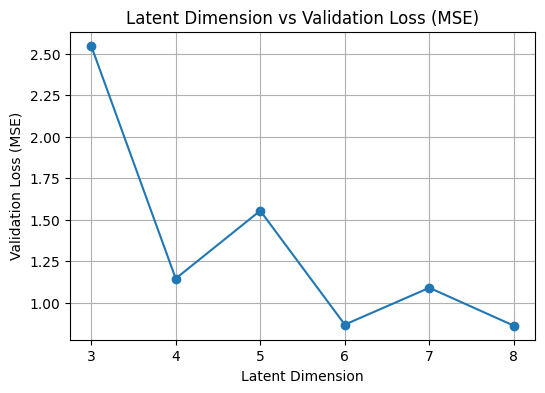

In [31]:
# %% [markdown]
# ### BEST MODEL MSE LOSS

# %% Imports
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

# %% Setup
latent_dims = [3, 4, 5, 6, 7, 8]
val_losses_final = []  
input_dim = X_train_resampled.shape[1]

best_val_loss = float('inf')
best_model = None
best_latent_dim = None
best_history = None

# %% Loop over latent dimensions
for dim in latent_dims:
    # Define architecture with latent layer named
    input_layer = layers.Input(shape=(input_dim,))
    x = layers.Dense(8, activation='relu')(input_layer)
    latent = layers.Dense(
        dim, activation='relu',
        activity_regularizer=regularizers.l1(1e-4),
        name="latent_layer"
    )(x)
    x = layers.Dense(8, activation='relu')(latent)
    output_layer = layers.Dense(input_dim, activation='linear')(x)

    autoencoder = models.Model(inputs=input_layer, outputs=output_layer)
    autoencoder.compile(optimizer='adam', loss='mse')

    # Train on resampled data
    history = autoencoder.fit(
        X_train_resampled, X_train_resampled,
        validation_data=(X_test, X_test),
        epochs=100,
        batch_size=32,
        shuffle=True,
        verbose=0
    )

    val_loss_final = history.history['val_loss'][-1]
    val_losses_final.append(val_loss_final)

    print(f"Latent dim = {dim}, Validation Loss final = {val_loss_final:.6f}")

    # Keep best model
    if val_loss_final < best_val_loss:
        best_val_loss = val_loss_final
        best_latent_dim = dim
        best_model = autoencoder
        best_history = history

# %% Plot latent_dim vs val_loss
plt.figure(figsize=(6,4))
plt.plot(latent_dims, val_losses_final, marker='o')
plt.title("Latent Dimension vs Validation Loss (MSE)")
plt.xlabel("Latent Dimension")
plt.ylabel("Validation Loss (MSE)")
plt.grid(True)
plt.show()

# %% Extract encoder from the best model
encoder = models.Model(
    inputs=best_model.input,
    outputs=best_model.get_layer("latent_layer").output
)



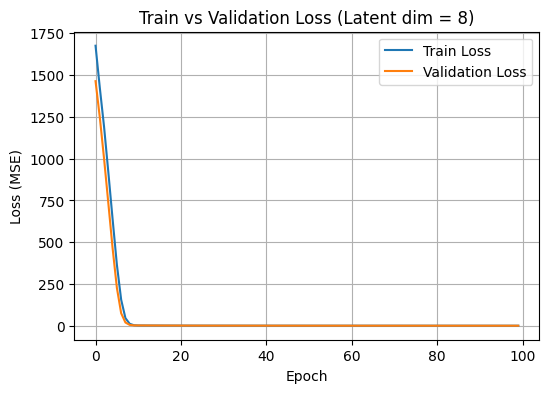

In [32]:
plt.figure(figsize=(6,4))
plt.plot(best_history.history['loss'], label='Train Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title(f"Train vs Validation Loss (Latent dim = {best_latent_dim})")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# %% Latent space representations
Z_train = encoder.predict(X_train_resampled)
Z_test   = encoder.predict(X_test)

print("Z_train shape:", Z_train.shape)
print("Z_test shape:", Z_test.shape)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Z_train shape: (900, 8)
Z_test shape: (165, 8)


## TSNE

C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
   

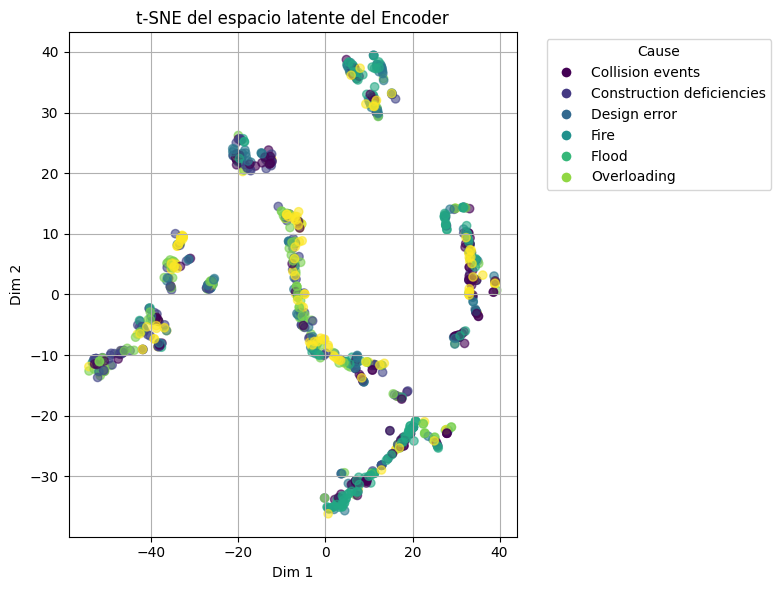

In [34]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# t-SNE del espacio latente
Z_tsne = TSNE(n_components=2, random_state=42).fit_transform(Z_train)

# Colores por clase
classes = np.unique(Y)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(Z_tsne[:, 0], Z_tsne[:, 1], c=y_train_resampled, cmap='viridis', alpha=0.6)

# Leyenda manual
handles = [plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor=plt.cm.viridis(i / len(classes)), 
                      markersize=8) for i in range(len(classes))]
plt.legend(handles, classes, title="Cause", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("t-SNE del espacio latente del Encoder")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.tight_layout()
plt.show()


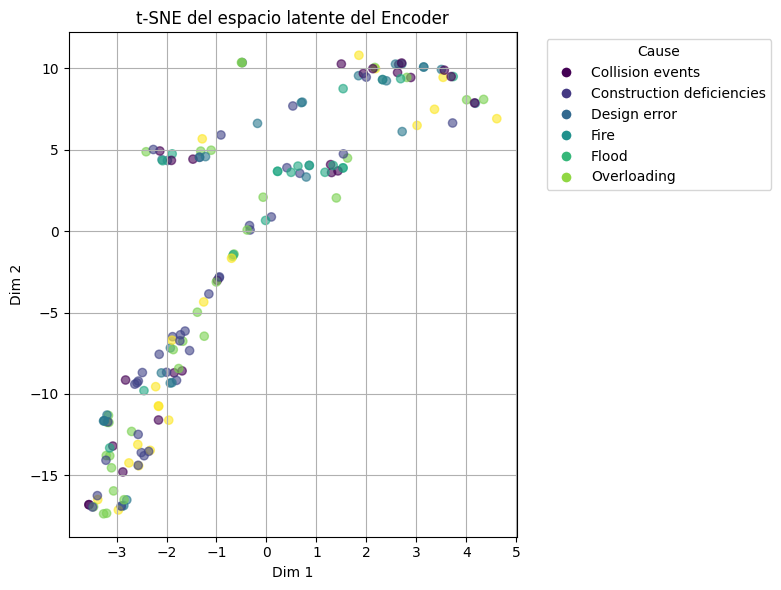

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# t-SNE del espacio latente
Z_tsne = TSNE(n_components=2, random_state=42).fit_transform(Z_test)

# Colores por clase
classes = np.unique(Y)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(Z_tsne[:, 0], Z_tsne[:, 1], c=y_test, cmap='viridis', alpha=0.6)

# Leyenda manual
handles = [plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor=plt.cm.viridis(i / len(classes)), 
                      markersize=8) for i in range(len(classes))]
plt.legend(handles, classes, title="Cause", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("t-SNE del espacio latente del Encoder")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.tight_layout()
plt.show()


# Random Forest Gini


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Inicializar Random Forest ---
rf = RandomForestClassifier(criterion='gini', random_state=42)

# --- 2. Definir grid de hiperparámetros ---
param_grid = {
    'n_estimators': [50, 100, 200],   # número de árboles
    'max_depth': [None, 5, 10, 20],   # profundidad máxima
    'min_samples_split': [2, 5, 10]   # mínimo de muestras para dividir
}

# --- 3. GridSearchCV ---
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_weighted',  # como con KNN
    cv=5,
    n_jobs=-1
)

# --- 4. Entrenar el modelo ---
grid_search_rf.fit(Z_train, y_train_resampled)

# --- 5. Predicción ---
y_pred_rf = grid_search_rf.predict(Z_test)

# --- 6. Resultados ---
print("Mejor hiperparámetro:", grid_search_rf.best_params_)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, digits=4))


Mejor hiperparámetro: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

Confusion Matrix:
[[ 7  4  4  5  1  4]
 [ 7 13  3  2  8  5]
 [ 5  2  7  6  4  6]
 [ 3  1  0 13  1  1]
 [ 4  6  3  3 11  6]
 [ 4  5  2  1  3  5]]

Classification Report:
              precision    recall  f1-score   support

           0     0.2333    0.2800    0.2545        25
           1     0.4194    0.3421    0.3768        38
           2     0.3684    0.2333    0.2857        30
           3     0.4333    0.6842    0.5306        19
           4     0.3929    0.3333    0.3607        33
           5     0.1852    0.2500    0.2128        20

    accuracy                         0.3394       165
   macro avg     0.3387    0.3538    0.3369       165
weighted avg     0.3498    0.3394    0.3363       165



# bayesian


In [37]:

## AUTOENCODER


from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix


In [38]:
bayes_model = GaussianNB()

# Entrenar el modelo
bayes_model.fit(Z_train, y_train_resampled)


GaussianNB()

In [39]:
y_pred_bayes = bayes_model.predict(Z_test)


In [40]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bayes))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_bayes, digits=4))



Confusion Matrix:
[[ 0  8  1 16  0  0]
 [ 0 18  1 13  4  2]
 [ 0 10  0 19  1  0]
 [ 0  2  0 17  0  0]
 [ 0 13  1 15  4  0]
 [ 0 10  1  7  2  0]]

Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        25
           1     0.2951    0.4737    0.3636        38
           2     0.0000    0.0000    0.0000        30
           3     0.1954    0.8947    0.3208        19
           4     0.3636    0.1212    0.1818        33
           5     0.0000    0.0000    0.0000        20

    accuracy                         0.2364       165
   macro avg     0.1424    0.2483    0.1444       165
weighted avg     0.1632    0.2364    0.1570       165



C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

In [41]:

## AUTOENCODER


from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix

bayes_model = GaussianNB()

# Entrenar el modelo
bayes_model.fit(X_train,y_train)

y_pred_bayes = bayes_model.predict(X_test)




In [42]:
# --- Evaluación ---
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bayes))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_bayes, digits=4))


Confusion Matrix:
[[ 9  3  1  2  9  1]
 [ 7  8  0  7 14  2]
 [ 6  5  2  6 10  1]
 [ 3  2  0  8  6  0]
 [ 3  2  0  4 24  0]
 [ 2  2  2  2 10  2]]

Classification Report:
              precision    recall  f1-score   support

           0     0.3000    0.3600    0.3273        25
           1     0.3636    0.2105    0.2667        38
           2     0.4000    0.0667    0.1143        30
           3     0.2759    0.4211    0.3333        19
           4     0.3288    0.7273    0.4528        33
           5     0.3333    0.1000    0.1538        20

    accuracy                         0.3212       165
   macro avg     0.3336    0.3143    0.2747       165
weighted avg     0.3399    0.3212    0.2794       165



# knn

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd



# --- 3. KNN + GridSearchCV ---
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(2, 12)}

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='f1_weighted',  # weighted F1-score
    cv=5,
    n_jobs=-1
)

grid_search.fit(Z_train, y_train_resampled)

# --- 4. Predicción ---
y_pred = grid_search.predict(Z_test)

# --- 5. Resultados ---
print("Mejor n_neighbors:", grid_search.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))



Mejor n_neighbors: {'n_neighbors': 5}

Confusion Matrix:
[[ 8  5  4  6  1  1]
 [11 14  3  2  5  3]
 [ 6  3 12  3  3  3]
 [ 4  2  1 10  1  1]
 [ 5 10  3  4  8  3]
 [ 4  4  1  2  4  5]]

Classification Report:
              precision    recall  f1-score   support

           0     0.2105    0.3200    0.2540        25
           1     0.3684    0.3684    0.3684        38
           2     0.5000    0.4000    0.4444        30
           3     0.3704    0.5263    0.4348        19
           4     0.3636    0.2424    0.2909        33
           5     0.3125    0.2500    0.2778        20

    accuracy                         0.3455       165
   macro avg     0.3542    0.3512    0.3451       165
weighted avg     0.3609    0.3455    0.3461       165



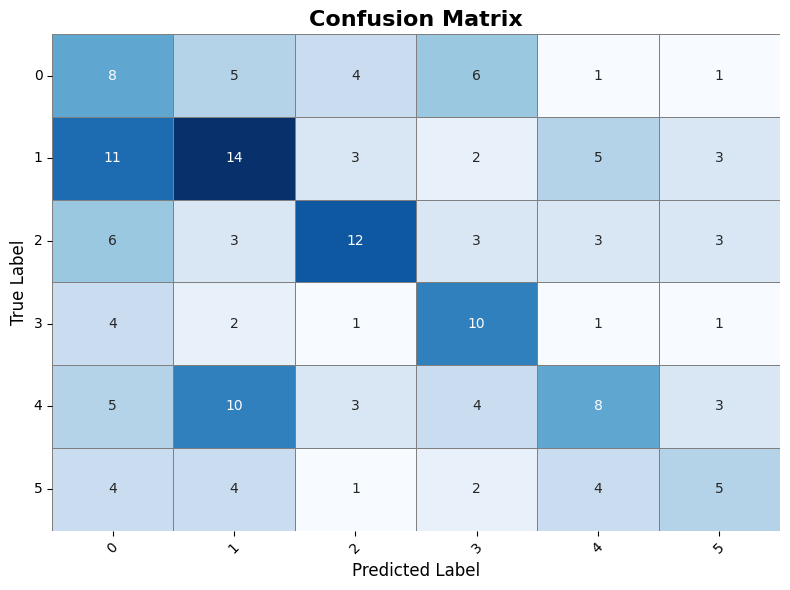

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique()) if hasattr(y_test, "unique") else sorted(set(y_test))

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=labels, yticklabels=labels,
    cbar=False, linewidths=0.5, linecolor="gray"
)

plt.title("Confusion Matrix", fontsize=16, weight="bold")
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## KNN

In [45]:
temp_df['Cause']

41               Collision events
43               Collision events
45               Collision events
46               Collision events
48               Collision events
                  ...            
1501    Construction deficiencies
1503                        Flood
1505                        Flood
1506    Construction deficiencies
1511                        Flood
Name: Cause, Length: 824, dtype: object

In [46]:
X_train= pd.DataFrame(X_train_resampled, columns=temp_df_no_cause.columns)
X_test = pd.DataFrame(X_test, columns=temp_df_no_cause.columns)
y_train=y_train_resampled

In [47]:
Y_val = pd.DataFrame(y_test, columns=['target'])

In [48]:
num_cols.remove('Date')

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder



preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_pipeline= Pipeline([

    ('preprocessing', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('model', KNeighborsClassifier())

])

param_grid={

    'model__n_neighbors': [3,5,7] 
}

In [51]:

grid_search=GridSearchCV(

    estimator=knn_pipeline,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

In [52]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['temperature_1.9',
                                                                          'temperature_1.9.1',
                                                                          'temperature_4.5',
                                                                          'temperature_7.0',
                                                                          'temperature_8.5']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Type',
                                                                          'Material',
                                                                          'Country'])])),
                                       ('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'model__n_neighbors': [3, 5, 7]},
             scoring='f1_macro')

In [53]:
print("Best k:", grid_search.best_params_['model__n_neighbors'])
print("Best cross-validated F1 (macro):", grid_search.best_score_)


Best k: 3
Best cross-validated F1 (macro): 0.3644445505268289


In [54]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred=grid_search.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  3  3  4  0  3]
 [11 18  3  5  1  0]
 [11  3  9  3  2  2]
 [ 5  2  1  9  0  2]
 [ 6  6  8  9  3  1]
 [ 5  3  4  4  2  2]]
              precision    recall  f1-score   support

           0       0.24      0.48      0.32        25
           1       0.51      0.47      0.49        38
           2       0.32      0.30      0.31        30
           3       0.26      0.47      0.34        19
           4       0.38      0.09      0.15        33
           5       0.20      0.10      0.13        20

    accuracy                           0.32       165
   macro avg       0.32      0.32      0.29       165
weighted avg       0.34      0.32      0.30       165



In [55]:
def print_cm(cm,model):
        
    # Plot
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.named_steps['model'].classes_,
                yticklabels=model.named_steps['model'].classes_)
    plt.title("Confusion Matrix - Training Set")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

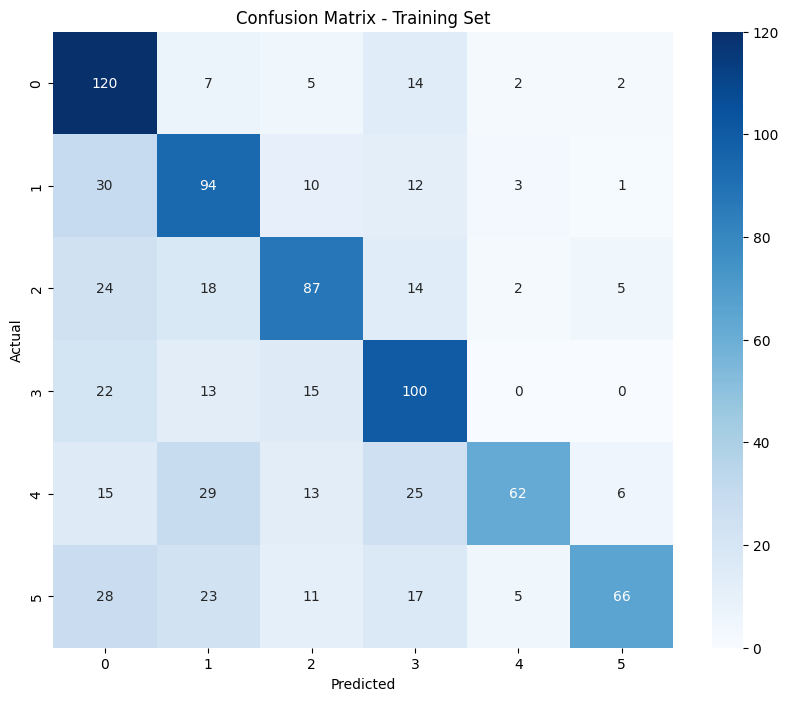

[[120   7   5  14   2   2]
 [ 30  94  10  12   3   1]
 [ 24  18  87  14   2   5]
 [ 22  13  15 100   0   0]
 [ 15  29  13  25  62   6]
 [ 28  23  11  17   5  66]]
              precision    recall  f1-score   support

           0       0.50      0.80      0.62       150
           1       0.51      0.63      0.56       150
           2       0.62      0.58      0.60       150
           3       0.55      0.67      0.60       150
           4       0.84      0.41      0.55       150
           5       0.82      0.44      0.57       150

    accuracy                           0.59       900
   macro avg       0.64      0.59      0.58       900
weighted avg       0.64      0.59      0.58       900



In [56]:
best_model_knn=grid_search.best_estimator_

y_train_pred=best_model_knn.predict(X_train)

cm=confusion_matrix(y_train,y_train_pred,labels=best_model_knn.named_steps['model'].classes_)
print_cm(cm,best_model_knn)

print(cm)
print(classification_report(y_train,y_train_pred))

In [57]:
from sklearn.ensemble import RandomForestClassifier

random_forest_pipeline=Pipeline([

    ('preprocessing',preprocessor),
    ('model', RandomForestClassifier)
])

In [58]:
import numpy as np
from sklearn.calibration import LabelEncoder
from sklearn.manifold import TSNE

def plot_tsne(pipeline, X, y, perplexity=30, n_iter=1000, random_state=42):
    
    preprocessor = pipeline.named_steps['preprocessing']
    X_preprocessed = preprocessor.fit_transform(X)

    if hasattr(X_preprocessed, "toarray"):
        X_preprocessed = X_preprocessed.toarray()
    
    if hasattr(y, 'values'):
        y = y.values

    if y.dtype == 'object' or y.dtype.name == 'category':
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)
        classes = label_encoder.classes_
    else:
        y_encoded = y
        classes = np.unique(y)

    tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=n_iter, random_state=random_state)
    X_tsne = tsne.fit_transform(X_preprocessed)

    plt.figure(figsize=(10, 6))
    for i, class_name in enumerate(classes):
        plt.scatter(X_tsne[y_encoded == i, 0], X_tsne[y_encoded == i, 1],
                    label=class_name, alpha=0.6, s=50)

    plt.title('t-SNE projection (by Cause)')
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')
    plt.legend(title='Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [59]:

knn_pipeline_no_model= Pipeline([

    ('preprocessing', preprocessor),
    ('scaler', StandardScaler()),

])

In [60]:
# plot_tsne(knn_pipeline,X,Y)
# plot_tsne(knn_pipeline_no_model,X_test,y_pred)

## RANDOM FOREST

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# --- 1. Random Forest + GridSearchCV ---
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_weighted',  # weighted F1-score
    cv=5,
    n_jobs=-1
)

# --- 2. Fit on training data ---
grid_search.fit(Z_train, y_train_resampled)

# --- 3. Predict on validation set ---
y_pred = grid_search.predict(Z_test)

# --- 4. Results ---
print("Best parameters:", grid_search.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Best parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}

Confusion Matrix:
[[ 7  4  4  6  0  4]
 [ 8 16  3  3  5  3]
 [ 4  3  6  6  4  7]
 [ 4  2  1 11  0  1]
 [ 4  5  3  3 14  4]
 [ 3  5  2  0  3  7]]

Classification Report:
              precision    recall  f1-score   support

           0     0.2333    0.2800    0.2545        25
           1     0.4571    0.4211    0.4384        38
           2     0.3158    0.2000    0.2449        30
           3     0.3793    0.5789    0.4583        19
           4     0.5385    0.4242    0.4746        33
           5     0.2692    0.3500    0.3043        20

    accuracy                         0.3697       165
   macro avg     0.3655    0.3757    0.3625       165
weighted avg     0.3821    0.3697    0.3686       165



In [62]:
random_forest_pipeline= Pipeline([
    ('preprocessing',preprocessor),
    ('model',RandomForestClassifier(class_weight='balanced_subsample', random_state=42)
)
])


In [63]:
param_grid = {
    'model__max_depth': [5],
    'model__min_samples_leaf': [2],
}


In [64]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_random_forest = GridSearchCV(random_forest_pipeline, param_grid, cv=cv, scoring='precision_weighted')


In [65]:
grid_search_random_forest.fit(X_train,y_train)
 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['temperature_1.9',
                                                                          'temperature_1.9.1',
                                                                          'temperature_4.5',
                                                                          'temperature_7.0',
                                                                          'temperature_8.5']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Type',
                                                                          'Material',
                                                                          'Country'])])),
                                       ('model',
                                        RandomForestClassifier(class_weight='balanced_subsample',
                                                               random_state=42))]),
             param_grid={'model__max_depth': [5],
                         'model__min_samples_leaf': [2]},
             scoring='precision_weighted')

In [66]:
y_pred=grid_search_random_forest.predict(X_test)

In [67]:
best_estimator=grid_search_random_forest.best_estimator_

print("Best estimator: "+str(best_estimator))

best_params=grid_search_random_forest.best_params_

print("Best parameters: "+str(best_params))

best_score=grid_search_random_forest.best_score_

print("Best score: "+str(best_score))


Best estimator: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temperature_1.9',
                                                   'temperature_1.9.1',
                                                   'temperature_4.5',
                                                   'temperature_7.0',
                                                   'temperature_8.5']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Material',
                                                   'Country'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=5, min_samples_leaf=2,
                                        random_state=42))])
Be

In [68]:
print(confusion_matrix(Y_val,y_pred))
print(classification_report(Y_val,y_pred,target_names=lb.classes_)) 

[[ 9  1  4  5  2  4]
 [ 4  9  4  5 10  6]
 [ 3  4  5  7  6  5]
 [ 2  1  0 13  1  2]
 [ 3  1  3  2 23  1]
 [ 1  3  1  1  6  8]]
                           precision    recall  f1-score   support

         Collision events       0.41      0.36      0.38        25
Construction deficiencies       0.47      0.24      0.32        38
             Design error       0.29      0.17      0.21        30
                     Fire       0.39      0.68      0.50        19
                    Flood       0.48      0.70      0.57        33
              Overloading       0.31      0.40      0.35        20

                 accuracy                           0.41       165
                macro avg       0.39      0.42      0.39       165
             weighted avg       0.40      0.41      0.38       165



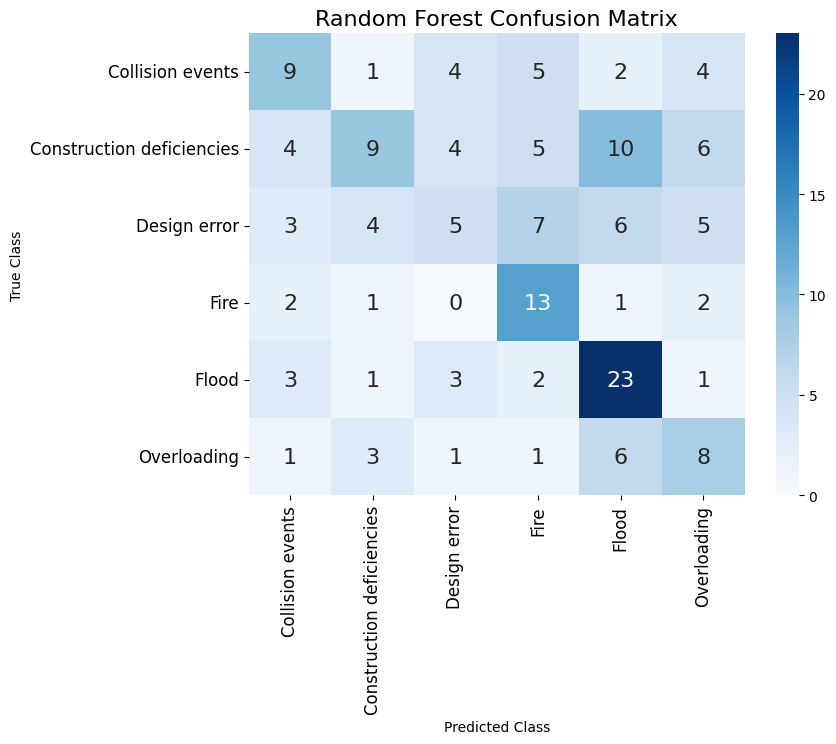

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming Y_val and y_pred are your true and predicted labels
cm = confusion_matrix(Y_val, y_pred)
labels = lb.classes_  # Your class names

# Plotting
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 16})  # Increase the font size here
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Random Forest Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


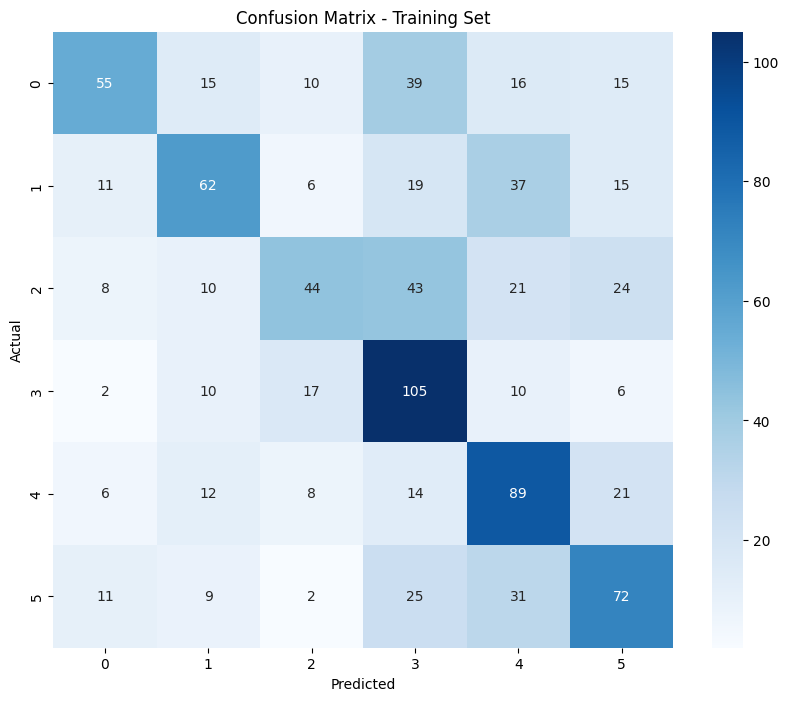

              precision    recall  f1-score   support

           0       0.59      0.37      0.45       150
           1       0.53      0.41      0.46       150
           2       0.51      0.29      0.37       150
           3       0.43      0.70      0.53       150
           4       0.44      0.59      0.50       150
           5       0.47      0.48      0.48       150

    accuracy                           0.47       900
   macro avg       0.49      0.47      0.47       900
weighted avg       0.49      0.47      0.47       900



In [70]:
best_model_random_forest=grid_search_random_forest.best_estimator_

y_train_pred_forest=best_model_random_forest.predict(X_train)

cm_random_forest = confusion_matrix(
    y_train, 
    y_train_pred_forest, 
    labels=best_model_random_forest.named_steps['model'].classes_
)
print_cm(cm_random_forest,best_model_random_forest)

print(classification_report(y_train,y_train_pred_forest))

## MLP

In [71]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# MLP (Multi-Layer Perceptron)
# -----------------------------
mlp = MLPClassifier(max_iter=500, random_state=42)

mlp_param_grid = {
    'hidden_layer_sizes': [(32,), (64,), (32,16)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}

mlp_grid = GridSearchCV(
    estimator=mlp,
    param_grid=mlp_param_grid,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1
)

# Entrenamiento sobre el latent space de entrenamiento y labels resampleados
mlp_grid.fit(Z_train, y_train_resampled)

# Predicción sobre el latent space de validación
y_pred_mlp = mlp_grid.predict(Z_test)

print("\n=== MLP ===")
print("Mejores parámetros:", mlp_grid.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp, digits=4))



=== MLP ===
Mejores parámetros: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (32, 16), 'learning_rate_init': 0.001}

Confusion Matrix:
[[ 9  4  1  6  0  5]
 [ 2 12  2 10  4  8]
 [10  2  0  9  6  3]
 [ 4  1  1 11  0  2]
 [ 5  8  0  8 10  2]
 [ 5  4  0  1  3  7]]

Classification Report:
              precision    recall  f1-score   support

           0     0.2571    0.3600    0.3000        25
           1     0.3871    0.3158    0.3478        38
           2     0.0000    0.0000    0.0000        30
           3     0.2444    0.5789    0.3438        19
           4     0.4348    0.3030    0.3571        33
           5     0.2593    0.3500    0.2979        20

    accuracy                         0.2970       165
   macro avg     0.2638    0.3180    0.2744       165
weighted avg     0.2746    0.2970    0.2727       165



In [72]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [85]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Type', 'Material','Country'])
])

In [86]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    alpha=0.0005,
    max_iter=1000,
    random_state=42
)

In [87]:
mlp_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', mlp)
])

In [88]:
mlp_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temperature_1.9',
                                                   'temperature_1.9.1',
                                                   'temperature_4.5',
                                                   'temperature_7.0',
                                                   'temperature_8.5']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Material',
                                                   'Country'])])),
                ('model',
                 MLPClassifier(alpha=0.0005, hidden_layer_sizes=(128, 64),
                               max_iter=1000, random_state=42))])

In [89]:
y_pred = mlp_pipeline.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred,target_names=lb.classes_))

[[10  2  3  4  2  4]
 [ 4 17  5  3  7  2]
 [ 3  1 12  3  4  7]
 [ 3  3  0 10  0  3]
 [ 2  4  5  1 14  7]
 [ 2  2  3  1  5  7]]
                           precision    recall  f1-score   support

         Collision events       0.42      0.40      0.41        25
Construction deficiencies       0.59      0.45      0.51        38
             Design error       0.43      0.40      0.41        30
                     Fire       0.45      0.53      0.49        19
                    Flood       0.44      0.42      0.43        33
              Overloading       0.23      0.35      0.28        20

                 accuracy                           0.42       165
                macro avg       0.43      0.42      0.42       165
             weighted avg       0.44      0.42      0.43       165



In [90]:
lb.classes_

array(['Collision events', 'Construction deficiencies', 'Design error',
       'Fire', 'Flood', 'Overloading'], dtype=object)

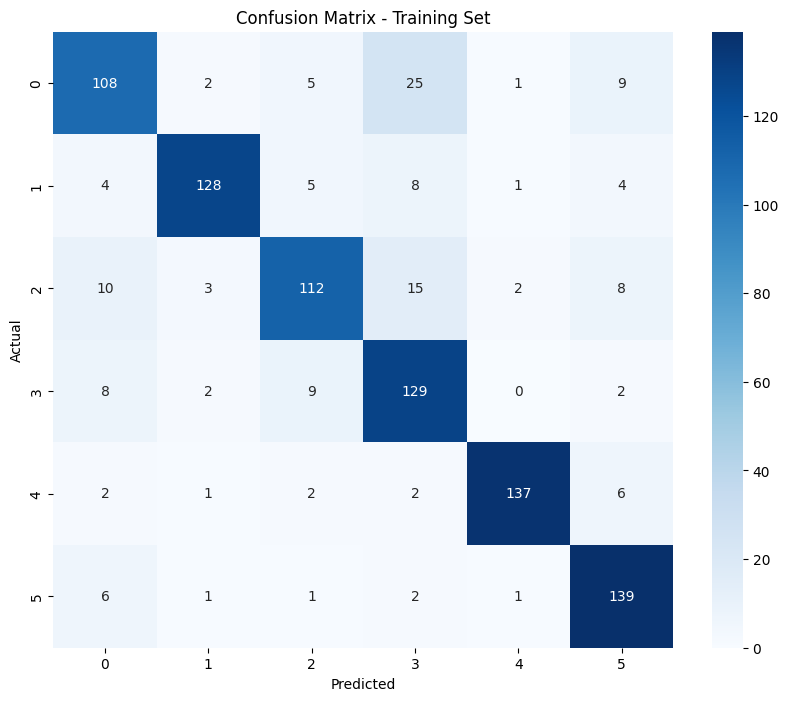

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       150
           1       0.93      0.85      0.89       150
           2       0.84      0.75      0.79       150
           3       0.71      0.86      0.78       150
           4       0.96      0.91      0.94       150
           5       0.83      0.93      0.87       150

    accuracy                           0.84       900
   macro avg       0.84      0.84      0.84       900
weighted avg       0.84      0.84      0.84       900



In [91]:
#Confusino Matrix MLP


best_model_mlp=mlp_pipeline

y_train_pred_mlp=best_model_mlp.predict(X_train)

cm_mlp = confusion_matrix(
    y_train, 
    y_train_pred_mlp, 
    labels=best_model_mlp.named_steps['model'].classes_
)
print_cm(cm_mlp,best_model_mlp)

print(classification_report(y_train,y_train_pred_mlp))

## LightGBM


In [92]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    objective='multiclass',
    class_weight='balanced',  
    random_state=42,
    n_jobs=-1
)

pipeline_lgbm = Pipeline([
    ('preprocessing', preprocessor),  
    ('model', lgbm)
])

In [93]:
param_grid_lgbm = {
    "model__n_estimators": [200, 500, 1000],
    "model__learning_rate": [0.1, 0.05, 0.01],
    "model__max_depth": [-1, 5, 10, 15],   # -1 = no limit
    "model__num_leaves": [15, 31, 63, 127],
    "model__min_child_samples": [10, 20, 50, 100],
    "model__subsample": [0.6, 0.8, 1.0],
    "model__colsample_bytree": [0.6, 0.8, 1.0],
    "model__reg_alpha": [0, 0.1, 1],
    "model__reg_lambda": [0, 0.1, 1],
}


In [94]:
cv_lgbm = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_lgbm = GridSearchCV(
    estimator=pipeline_lgbm,
    param_grid=param_grid,
    scoring='precision_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=1
)


In [95]:
grid_search_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1412
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 76
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further sp

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['temperature_1.9',
                                                                          'temperature_1.9.1',
                                                                          'temperature_4.5',
                                                                          'temperature_7.0',
                                                                          'temperature_8.5']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Type',
                                                                          'Material',
                                                                          'Country'])])),
                                       ('model',
                                        LGBMClassifier(class_weight='balanced',
                                                       n_jobs=-1,
                                                       objective='multiclass',
                                                       random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [5],
                         'model__min_samples_leaf': [2]},
             scoring='precision_weighted', verbose=1)

In [96]:
y_test_pred = grid_search_lgbm.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2


C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## LIGHTGBM TEST SET

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.31      0.36      0.33        25
           1       0.58      0.39      0.47        38
           2       0.32      0.30      0.31        30
           3       0.39      0.47      0.43        19
           4       0.45      0.39      0.42        33
           5       0.30      0.45      0.36        20

    accuracy                           0.39       165
   macro avg       0.39      0.40      0.39       165
weighted avg       0.41      0.39      0.39       165

